# LoanTap - Logistic Regression (Case Study)

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:
1. Personal Loan
2. EMI Free Loan
3. Personal Overdraft
4. Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only.

**Problem Statement:**
Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?


**Column Profiling:**

1. **loan_amnt:** Amount borrower applied for.

2. **term:** Loan duration (36 or 60 months).

3. **int_rate:** Interest rate on loan.

4. **installment:** Monthly repayment amount.

5. **grade:** LoanTap assigned loan grade (Risk ratings by LoanTap).

6. **sub_grade:** LoanTap assigned loan subgrade (Risk ratings by LoanTap).

7. **emp_title:** Borrower's job title.

8. **emp_length:**  Duration of borrower's employment (0-10 years).

9. **home_ownership:**  Borrower's housing situation (own, rent, etc.).

10. **annual_inc:** Borrower's yearly income.

11. **verification_status:** IWhether borrower's income was verified.

12. **issue_d:** Loan issuance month.

13. **loan_status:** Current status of the loan (Target Variable).

14. **purpose:** Borrower's reason for the loan.

15. **title:** The loan's title provided by the borrower.

16. **dti:** (Debt-to-Income ratio) Monthly debt vs. monthly income ratio.

17. **earliest_cr_line:** Date of borrower's oldest credit account.

18. **open_acc:** Number of borrower's active credit lines.

19. **pub_rec:** Negative records on borrower's public credit profile.

20. **revol_bal:** Total credit balance.

21. **revol_util:** Usage percentage of 'revolving' accounts like credit cards.

22. **total_acc:**  Total number of borrower's credit lines.

23. **initial_list_status:** Loan's first category ('W' or 'F').

24. **application_type:** Individual or joint application.

25. **mort_acc:** Number of borrower's mortgages.

26. **pub_rec_bankruptcies:** Bankruptcy records for borrower.

27. **Address:** Borrower's location.


In [1]:
# Importing libraries

# Data processing
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Stats and model building
from scipy import stats
import statistics
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             roc_curve, auc, ConfusionMatrixDisplay,
                             f1_score, recall_score,
                             precision_score, precision_recall_curve,
                             average_precision_score, classification_report)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

# Hide warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
# get the dataset (csv file) from the link

!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:01<00:00, 60.8MB/s]


## Observations on Data

In [3]:
# read the csv file

df = pd.read_csv("logistic_regression.csv")

In [4]:
# shape of the data

df.shape

(396030, 27)

**Insights:** Dataset has 396030 rows and 27 columns.


In [5]:
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0     0.0   20131.0       53.3      27.0                    f   
2     13.0     0.0   11987.0       92.2      26.0                    f   
3      6.0     0.0    5472.0       21.5      13.0                    f   
4     13.0     0.0   24584.0       69.8      43.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650  

[5 rows x 27 columns]

In [6]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [7]:
# Basic Information about the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [8]:
# Statistical summary

df.describe().T

count          mean           std     min       25%  \
loan_amnt             396030.0  14113.888089   8357.441341  500.00   8000.00   
int_rate              396030.0     13.639400      4.472157    5.32     10.49   
installment           396030.0    431.849698    250.727790   16.08    250.33   
annual_inc            396030.0  74203.175798  61637.621158    0.00  45000.00   
dti                   396030.0     17.379514     18.019092    0.00     11.28   
open_acc              396030.0     11.311153      5.137649    0.00      8.00   
pub_rec               396030.0      0.178191      0.530671    0.00      0.00   
revol_bal             396030.0  15844.539853  20591.836109    0.00   6025.00   
revol_util            395754.0     53.791749     24.452193    0.00     35.80   
total_acc             396030.0     25.414744     11.886991    2.00     17.00   
mort_acc              358235.0      1.813991      2.147930    0.00      0.00   
pub_rec_bankruptcies  395495.0      0.121648      0.356174    0.00      0.00   

                           50%       75%         max  
loan_amnt             12000.00  20000.00    40000.00  
int_rate                 13.33     16.49       30.99  
installment             375.43    567.30     1533.81  
annual_inc            64000.00  90000.00  8706582.00  
dti                      16.91     22.98     9999.00  
open_acc                 10.00     14.00       90.00  
pub_rec                   0.00      0.00       86.00  
revol_bal             11181.00  19620.00  1743266.00  
revol_util               54.80     72.90      892.30  
total_acc                24.00     32.00      151.00  
mort_acc                  1.00      3.00       34.00  
pub_rec_bankruptcies      0.00      0.00        8.00

In [9]:
df.describe(include='object').T

count  unique                          top    freq
term                 396030       2                    36 months  302005
grade                396030       7                            B  116018
sub_grade            396030      35                           B3   26655
emp_title            373103  173105                      Teacher    4389
emp_length           377729      11                    10+ years  126041
home_ownership       396030       6                     MORTGAGE  198348
verification_status  396030       3                     Verified  139563
issue_d              396030     115                     Oct-2014   14846
loan_status          396030       2                   Fully Paid  318357
purpose              396030      14           debt_consolidation  234507
title                394274   48816           Debt consolidation  152472
earliest_cr_line     396030     684                     Oct-2000    3017
initial_list_status  396030       2                            f  238066
application_type     396030       3                   INDIVIDUAL  395319
address              396030  393700  USCGC Smith\r\nFPO AE 70466       8

In [10]:
# Convert issue date & earliest credit line to datetime

df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [11]:
# Converting loan's title to lower case and strip extra spaces to avoid inconsistencies in title

df['title'] = df['title'].str.lower().str.strip()

In [12]:
df['title'].nunique()

40139

In [13]:
# Converting Borrower's title to lower case and strip extra spaces to avoid inconsistencies in emp_title

df['emp_title'] = df['emp_title'].str.lower().str.strip()

In [14]:
df['emp_title'].nunique()

149260

In [15]:
df['address'].sample(10)

298908            00637 Perry Greens\r\nByrdshire, CA 29597
74616                954 Scott Park\r\nJohnnystad, OK 93700
122505                   PSC 8888, Box 5445\r\nAPO AA 48052
45626           566 Michael Brooks\r\nRichardland, AL 93700
44464          7093 Jessica Island\r\nSouth James, OH 86630
124157               8946 Thomas Curve\r\nAnabury, DE 48052
310195      468 Cheryl Branch\r\nLake Anthonybury, WI 93700
28941         129 Grant Mall Suite 398\r\nRyanton, AL 29597
265363    9239 Johnathan Loop Suite 288\r\nNorth Jessica...
316006    261 Rebecca Village Apt. 917\r\nNew Judith, NY...
Name: address, dtype: object

In [16]:
# Deriving zip code and state from address

df[['state', 'zip_code']] = df['address'].apply(lambda x: pd.Series([x[-8:-6], x[-5:]]))

In [17]:
df.state.nunique()

54

In [18]:
df.zip_code.nunique()

10

In [19]:
# Convert columns with less number of unique values to categorical columns

cat_cols = ['term', 'grade','sub_grade','emp_length','home_ownership','verification_status',
            'loan_status','purpose','initial_list_status','application_type','zip_code']

df[cat_cols] = df[cat_cols].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  category      
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  category      
 5   sub_grade             396030 non-null  category      
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  category      
 8   home_ownership        396030 non-null  category      
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  category      
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  category      
 13 

### Univariate Analysis


In [21]:
num_cols = df.select_dtypes(include=['float64']).columns.tolist()
print(num_cols)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


**Plotting histograms and KDE plots for continuous variables**

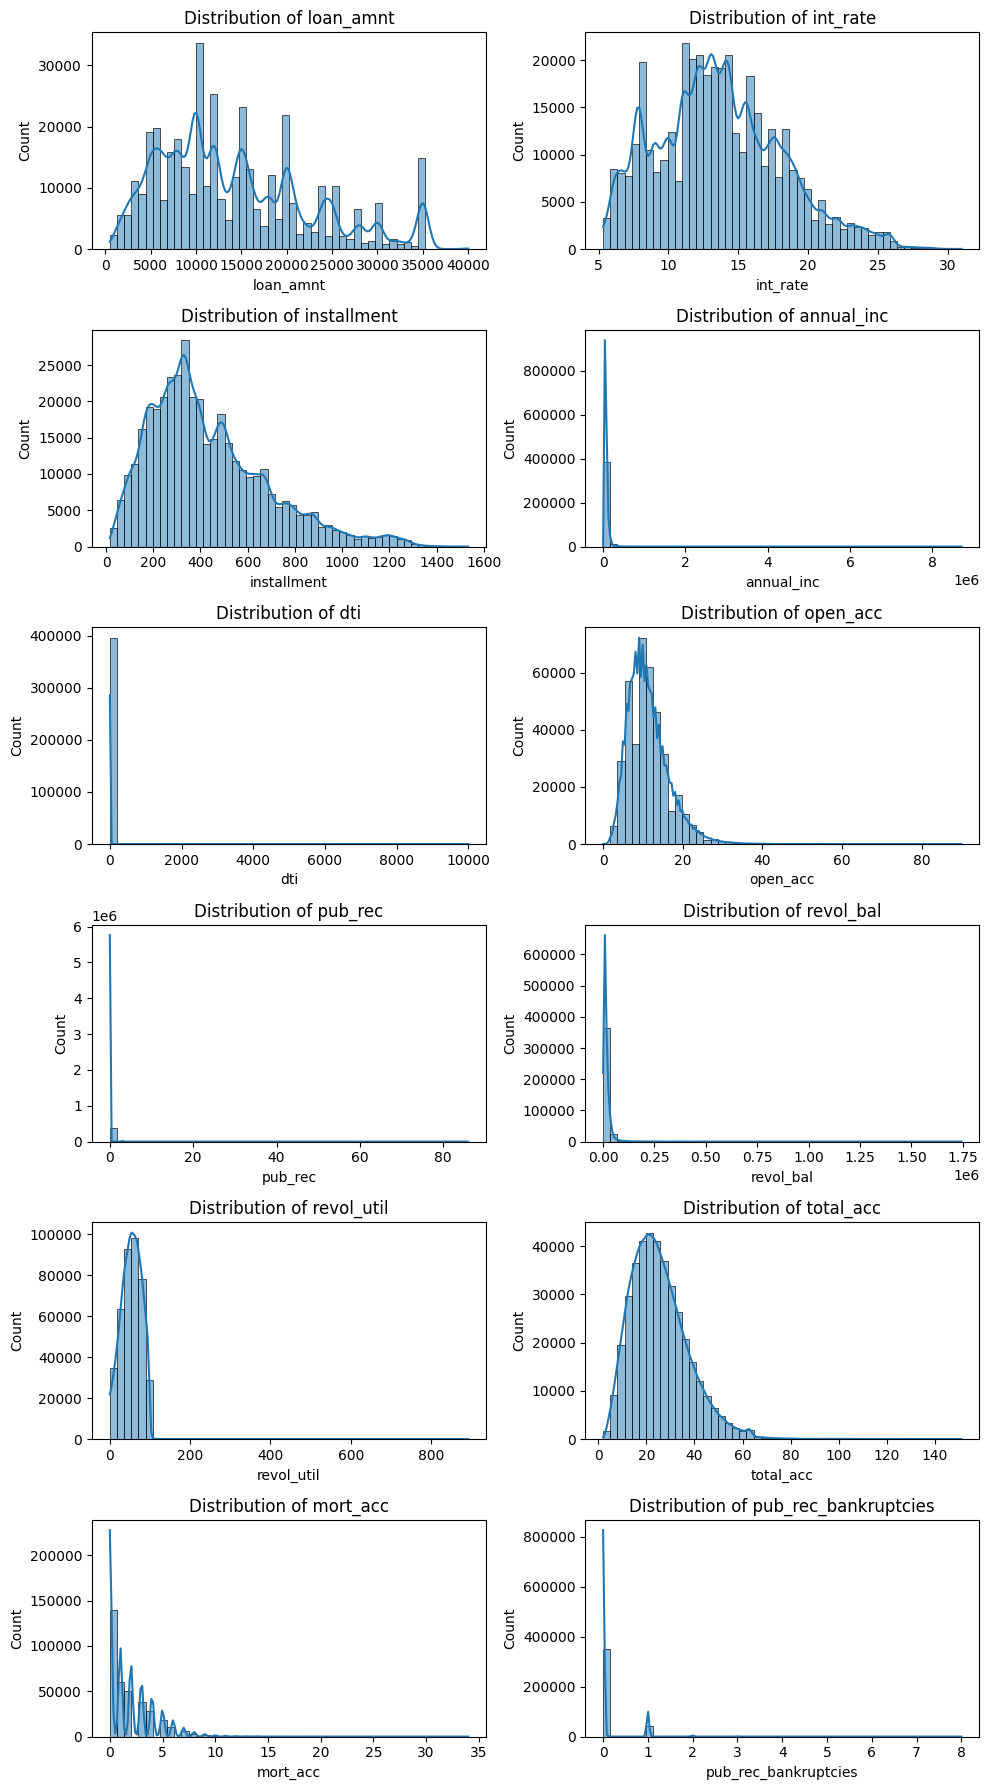

In [22]:
plt.subplots(6, 2, figsize=(10, 18))

for i, col in enumerate(num_cols):
  ax=plt.subplot(6,2,i+1)
  sns.histplot(data=df[col], kde=True, bins=50)
  plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Insights:** Almost all the distributions are normal but highly right skewed, confirming the presence of outliers.

**Plotting countplots for categorical variables**

In [23]:
cols = ['term','home_ownership','verification_status','loan_status','initial_list_status',
            'application_type','grade','sub_grade','emp_length','purpose','zip_code','state']

for col in cols:
    col_percentages = df[col].value_counts(normalize=True) * 100
    print(f"\nColumn: {col}")
    print(col_percentages)


Column: term
term
 36 months    76.258112
 60 months    23.741888
Name: proportion, dtype: float64

Column: home_ownership
home_ownership
MORTGAGE    50.084085
RENT        40.347953
OWN          9.531096
OTHER        0.028281
NONE         0.007828
ANY          0.000758
Name: proportion, dtype: float64

Column: verification_status
verification_status
Verified           35.240512
Source Verified    33.175517
Not Verified       31.583971
Name: proportion, dtype: float64

Column: loan_status
loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

Column: initial_list_status
initial_list_status
f    60.113123
w    39.886877
Name: proportion, dtype: float64

Column: application_type
application_type
INDIVIDUAL    99.820468
JOINT          0.107315
DIRECT_PAY     0.072217
Name: proportion, dtype: float64

Column: grade
grade
B    29.295255
C    26.762366
A    16.207611
D    16.040199
E     7.950913
F     2.972502
G     0.771154
Name: proportion, dtype: 

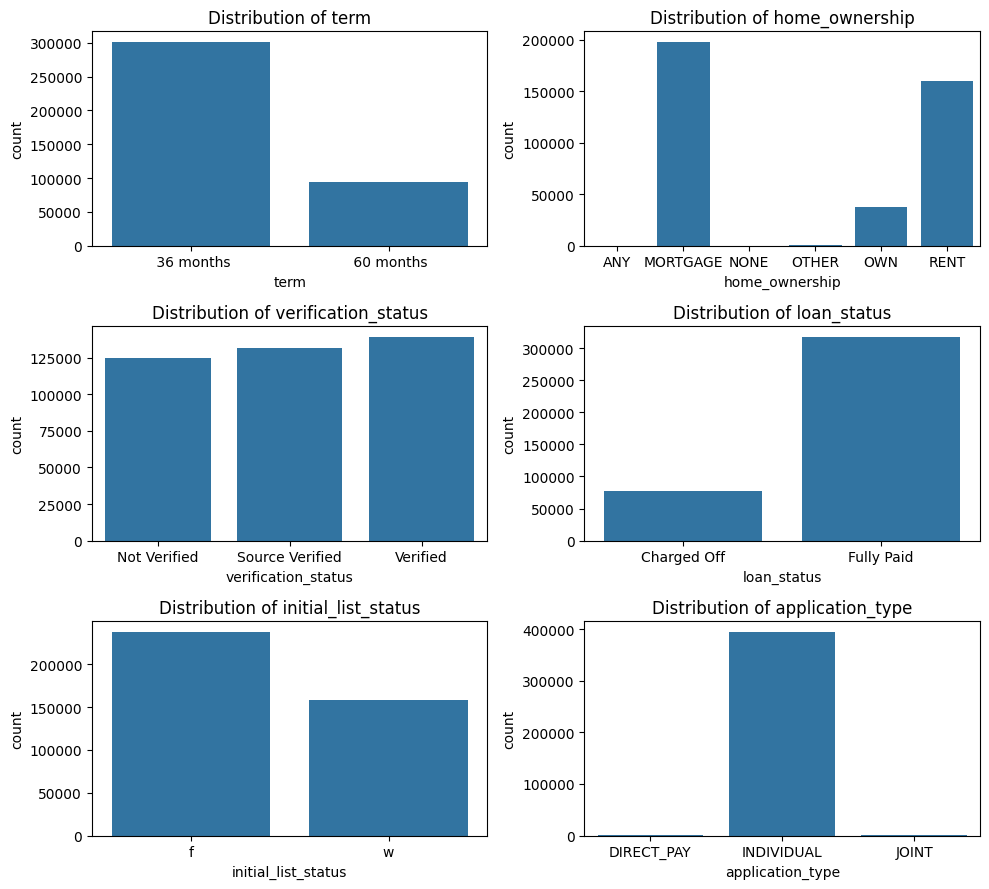

In [24]:
cols = ['term','home_ownership','verification_status','loan_status','initial_list_status','application_type']

plt.subplots(3, 2, figsize=(10, 9))

for i, col in enumerate(cols):
  ax = plt.subplot(3,2,i+1)
  sns.countplot(x=df[col])
  plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Insights:**

*  Almost 80% loans are of 36 months term.
*  Most borrowers (50%) have mortgages, followed by renters and owners.
*  Verified applications slightly outnumber Source Verified and Not Verified.
*  80% are Fully Paid, whereas 20% are Charged Off.
*  60% loans are listed as 'f' and 40% as 'w'.
*  99.8% applicants have applied under 'individual' application type.


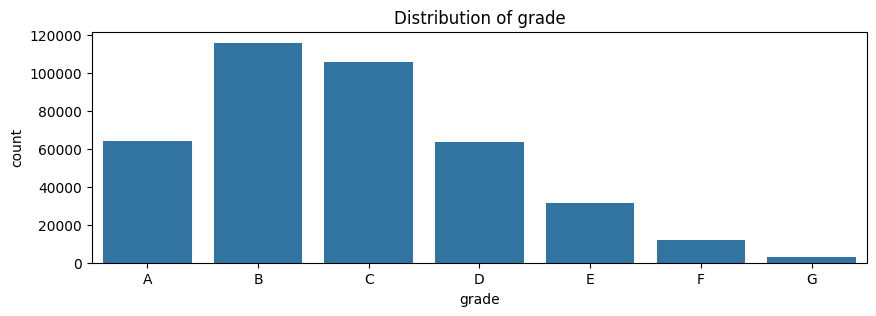

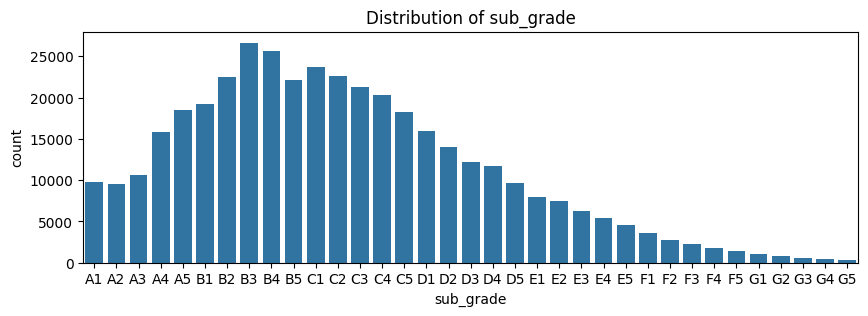

In [25]:
plt.figure(figsize=(10,3))
sns.countplot(x=df['grade'])
plt.title('Distribution of grade')

plt.figure(figsize=(10,3))
sns.countplot(x=df['sub_grade'])
plt.title('Distribution of sub_grade')

plt.show()

**Insights:**

*  Maximum loans (30%) fall in B grade, followed by C, A & D respectively.
*  Majority loans in B3, B4, C1 and C2 sub-categories, while minimum in G5 sub-category.

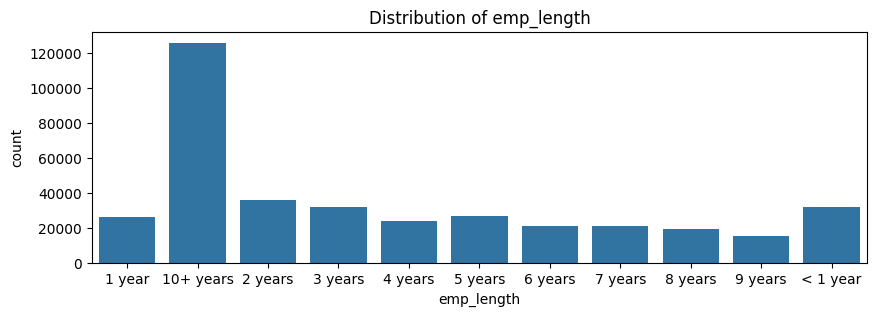

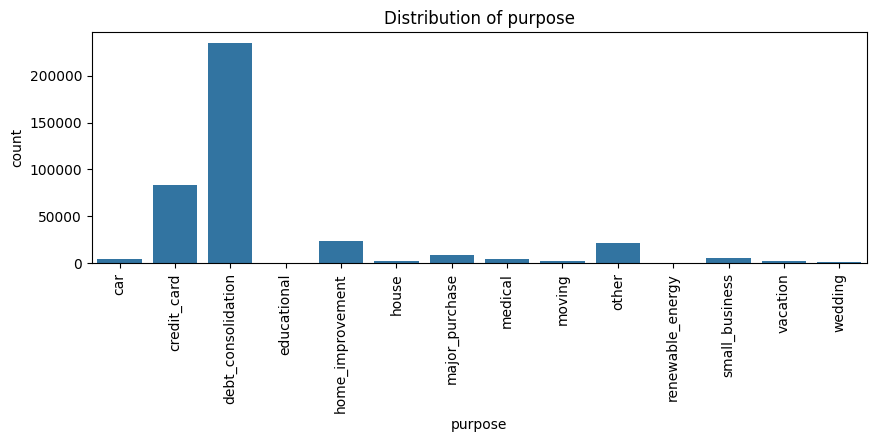

In [26]:
plt.figure(figsize=(10,3))
sns.countplot(x=df['emp_length'])
plt.title('Distribution of emp_length')

plt.figure(figsize=(10,3))
sns.countplot(x=df['purpose'])
plt.xticks(rotation=90)
plt.title('Distribution of purpose')

plt.show()

**Insights:**

*  Most applicants (33.3%) have 10+ years of employment.
*  Most loans (60%) are for debt consolidation, followed by credit card (20%) and then home improvement (6%).

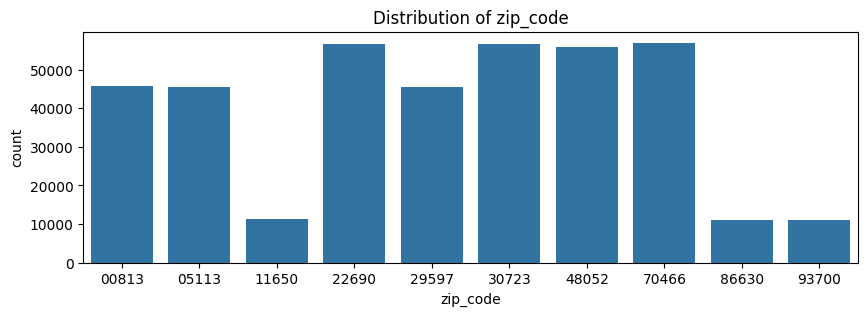

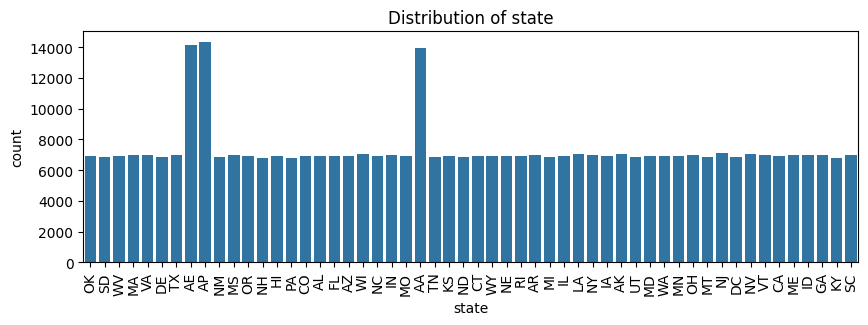

In [27]:
plt.figure(figsize=(10,3))
sns.countplot(x=df['zip_code'])
plt.title('Distribution of zip_code')

plt.figure(figsize=(10,3))
sns.countplot(x=df['state'])
plt.xticks(rotation=90)
plt.title('Distribution of state')

plt.show()

**Insights:**

*  70466, 30723, 22690 and 48052 are most popular zip codes where loans are applied.
*  AP, AE and AA are most popular states where loans are applied.

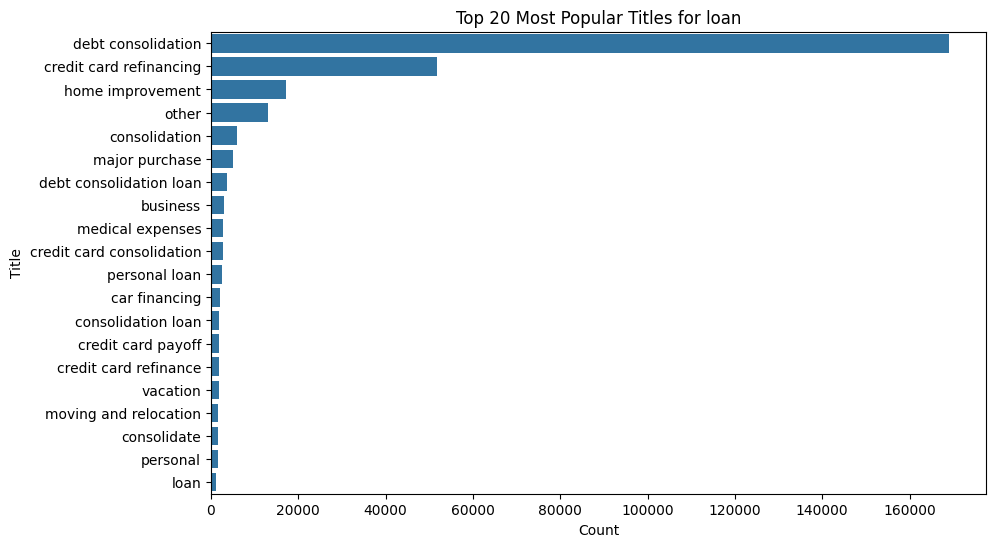

In [28]:
# Count the occurrences of each title
top_20_titles = df['title'].value_counts().head(20)

# Create a horizontal countplot
plt.figure(figsize=(10, 6))
sns.countplot(y='title', data=df, order=top_20_titles.index)
plt.title('Top 20 Most Popular Titles for loan')
plt.xlabel('Count')
plt.ylabel('Title')
plt.show()

**Insights:** Most loans are for debt consolidation, followed by credit card and then home improvement.

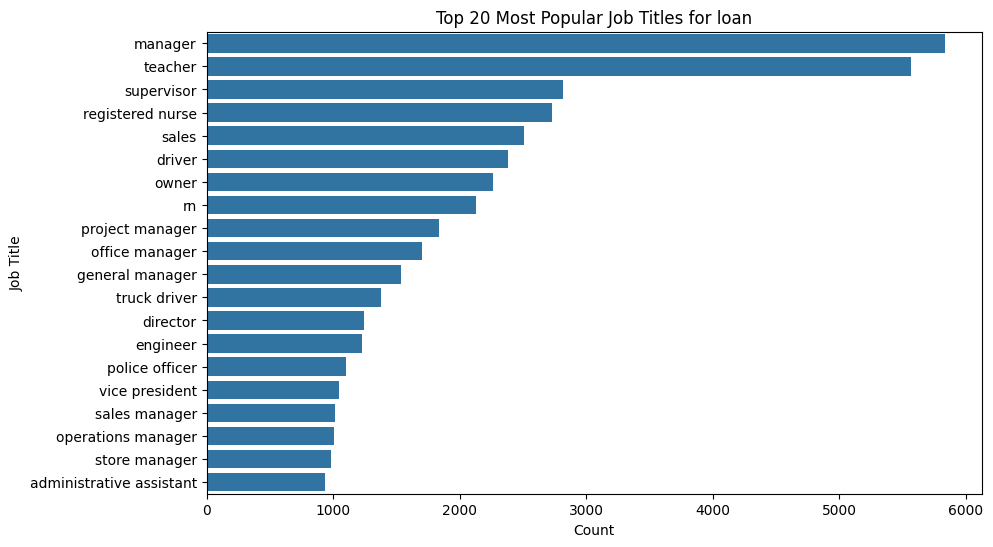

In [29]:
# Count the occurrences of each job title
top_20_emp_titles = df['emp_title'].value_counts().head(20)

# Create a horizontal countplot
plt.figure(figsize=(10, 6))
sns.countplot(y='emp_title', data=df, order=top_20_emp_titles.index)
plt.title('Top 20 Most Popular Job Titles for loan')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

**Insights:** Manager and Teacher are the most afforded job titles for loan.

### Bivariate Analysis

**Impact of categorical factors on loan status**

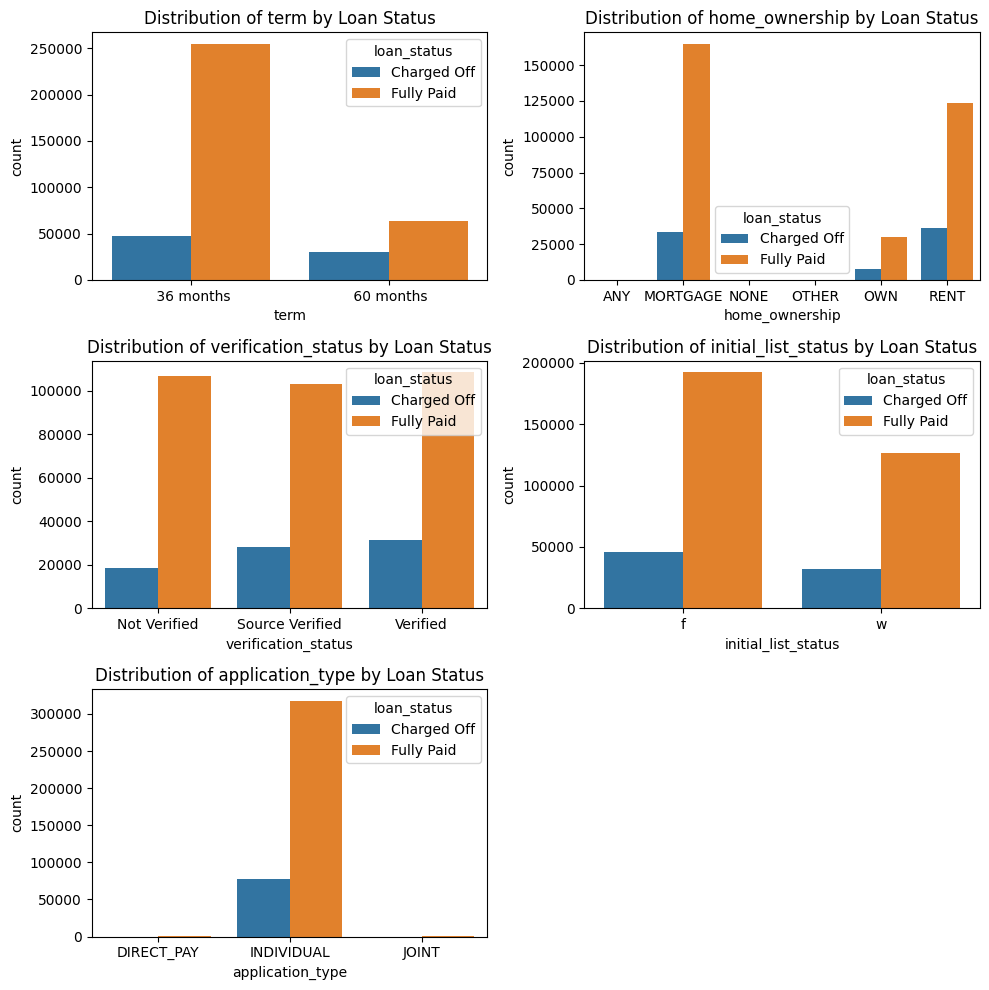

In [30]:
cols = ['term','home_ownership','verification_status','initial_list_status','application_type']

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, hue='loan_status', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Loan Status')

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

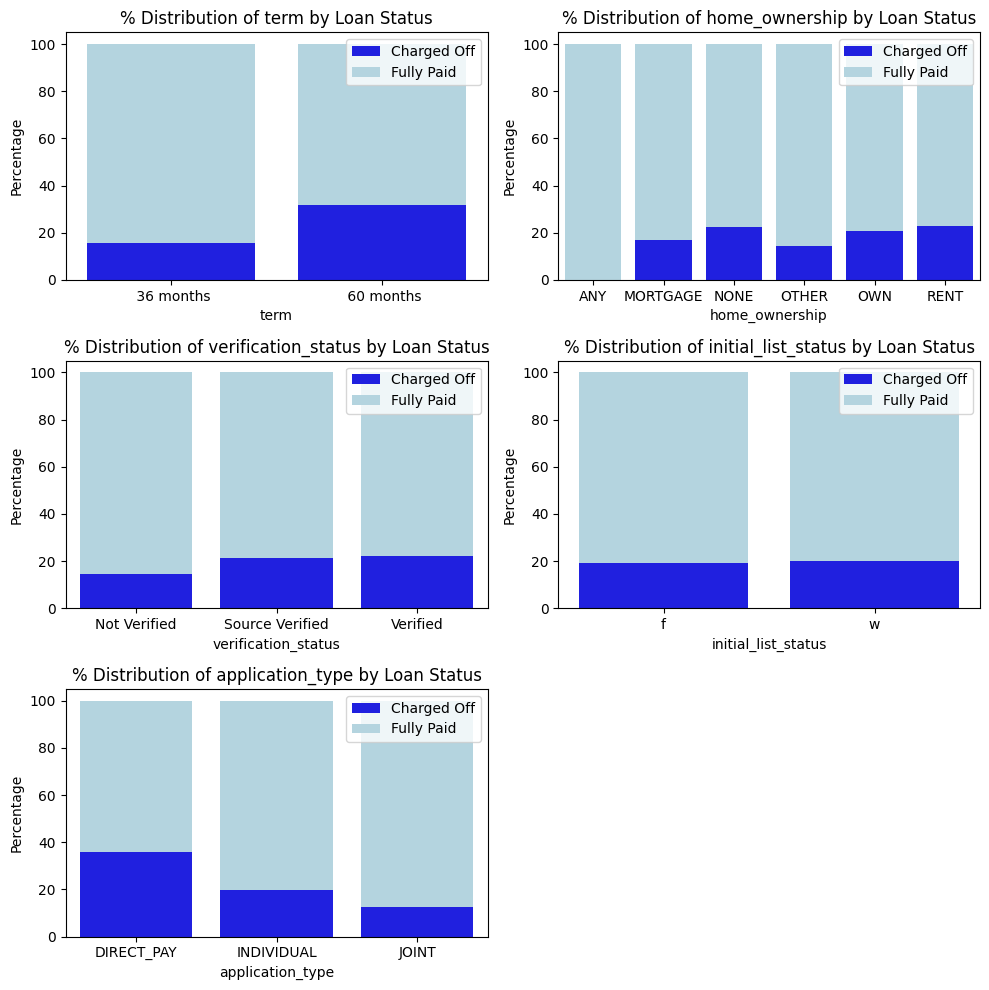

In [31]:
cols = ['term','home_ownership','verification_status','initial_list_status','application_type']

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
  # Calculate percentage of loan status within each column
  ls_col = df.groupby([col, 'loan_status']).size().unstack()
  ls_col = ls_col.div(ls_col.sum(axis=1), axis=0) * 100

  ax = axes[i]

  # Plotting stacked bars
  sns.barplot(x=ls_col.index,y=ls_col['Charged Off'],color='blue',label='Charged Off',ax=ax)
  sns.barplot(x=ls_col.index,y=ls_col['Fully Paid'],bottom=ls_col['Charged Off'],color='lightblue',label='Fully Paid',ax=ax)

  ax.set_title(f'% Distribution of {col} by Loan Status')
  ax.set_xlabel(f'{col}')
  ax.set_ylabel('Percentage')
  ax.legend()

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

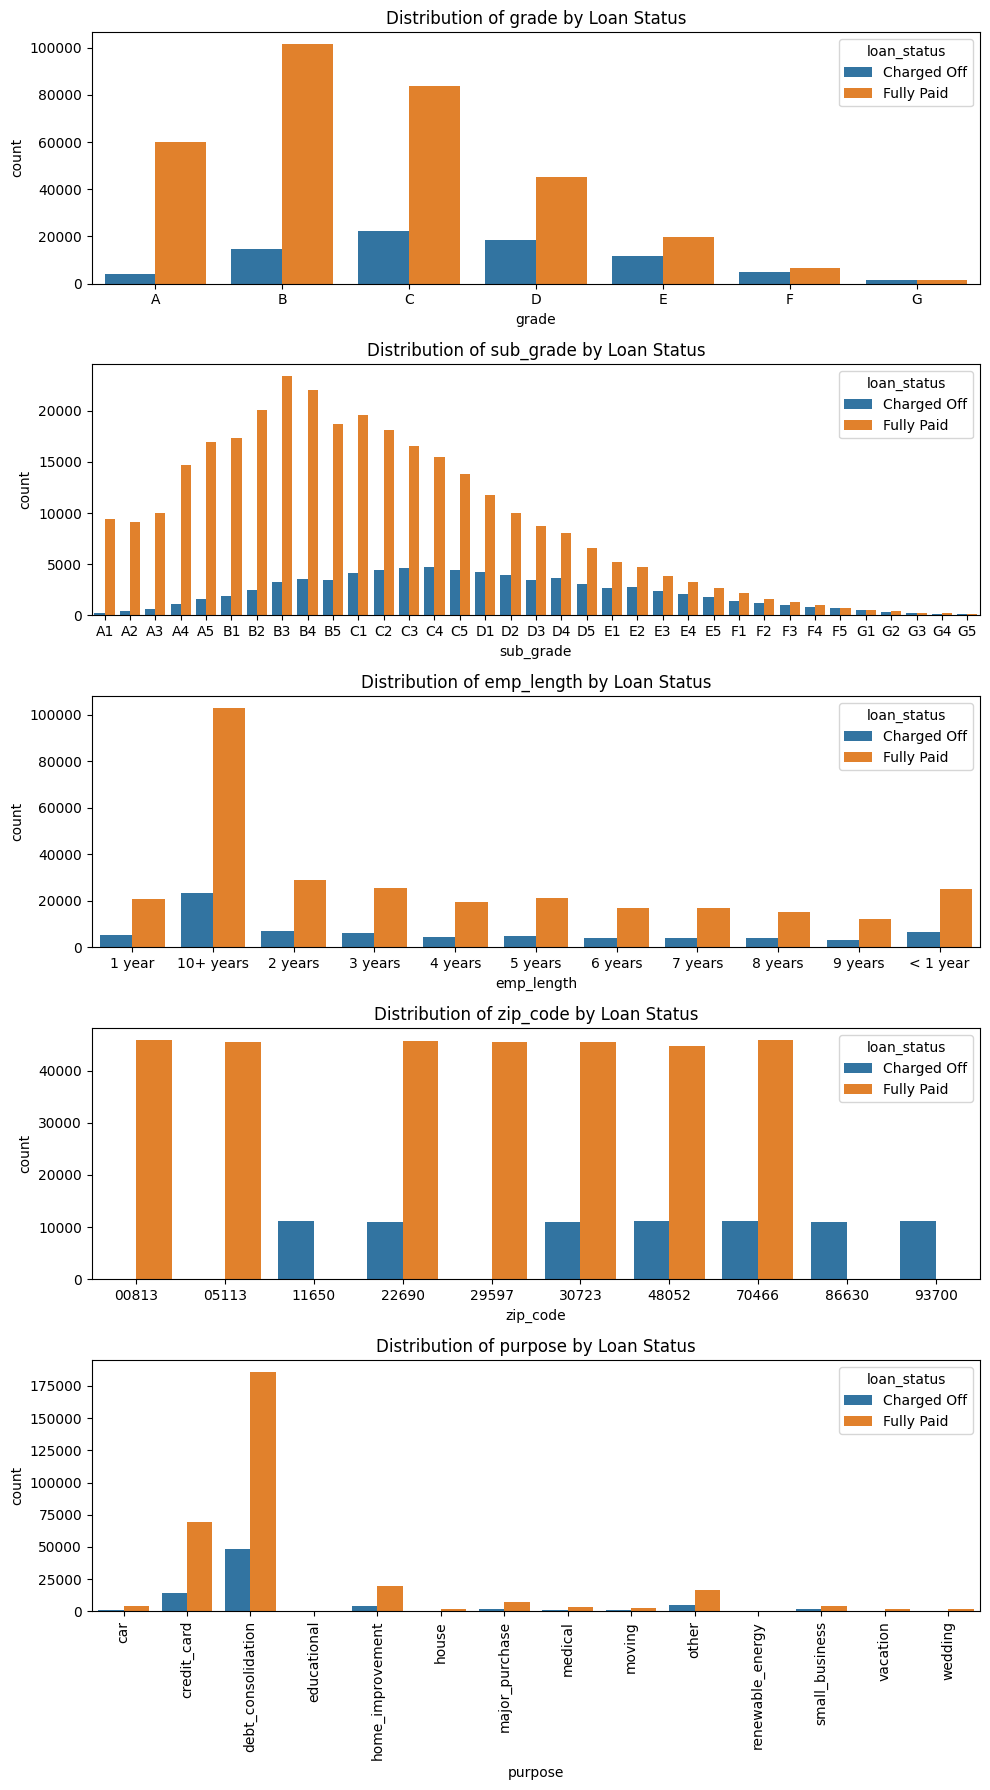

In [32]:
cols = ['grade','sub_grade','emp_length','zip_code','purpose']

plt.subplots(5, 1, figsize=(10, 18))

for i, col in enumerate(cols):
  ax = plt.subplot(5,1,i+1)
  sns.countplot(x=col, data=df, hue='loan_status')
  if col == 'purpose':
    plt.xticks(rotation=90)
  plt.title(f'Distribution of {col} by Loan Status')

plt.tight_layout()
plt.show()

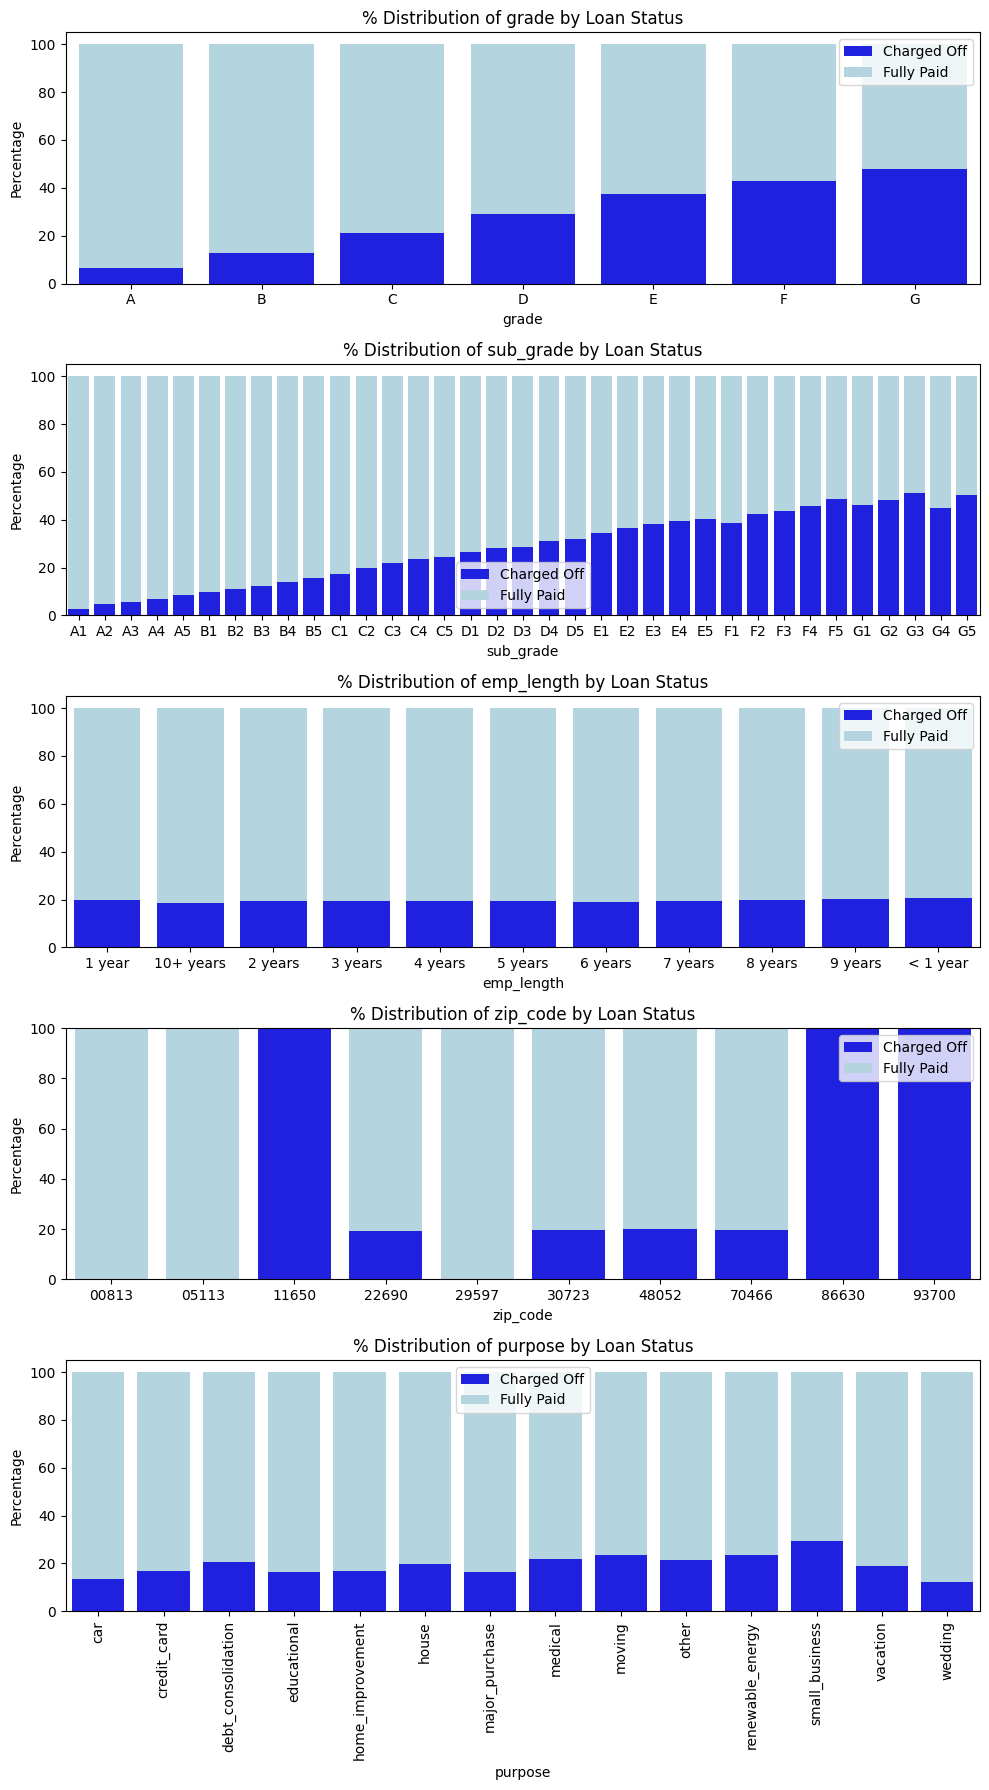

In [33]:
cols = ['grade','sub_grade','emp_length','zip_code','purpose']

plt.subplots(5, 1, figsize=(10, 18))

for i, col in enumerate(cols):
  # Calculate percentage of loan status within each column
  ls_col = df.groupby([col, 'loan_status']).size().unstack()
  ls_col = ls_col.div(ls_col.sum(axis=1), axis=0) * 100

  ax = plt.subplot(5,1,i+1)

  # Plotting stacked bars
  sns.barplot(x=ls_col.index, y=ls_col['Charged Off'], color='blue', label='Charged Off')
  sns.barplot(x=ls_col.index, y=ls_col['Fully Paid'], bottom=ls_col['Charged Off'], color='lightblue', label='Fully Paid')

  plt.title(f'% Distribution of {col} by Loan Status')
  plt.xlabel(f'{col}')
  plt.ylabel('Percentage')
  if col == 'purpose':
    plt.xticks(rotation=90)
  plt.legend()

plt.tight_layout()
plt.show()

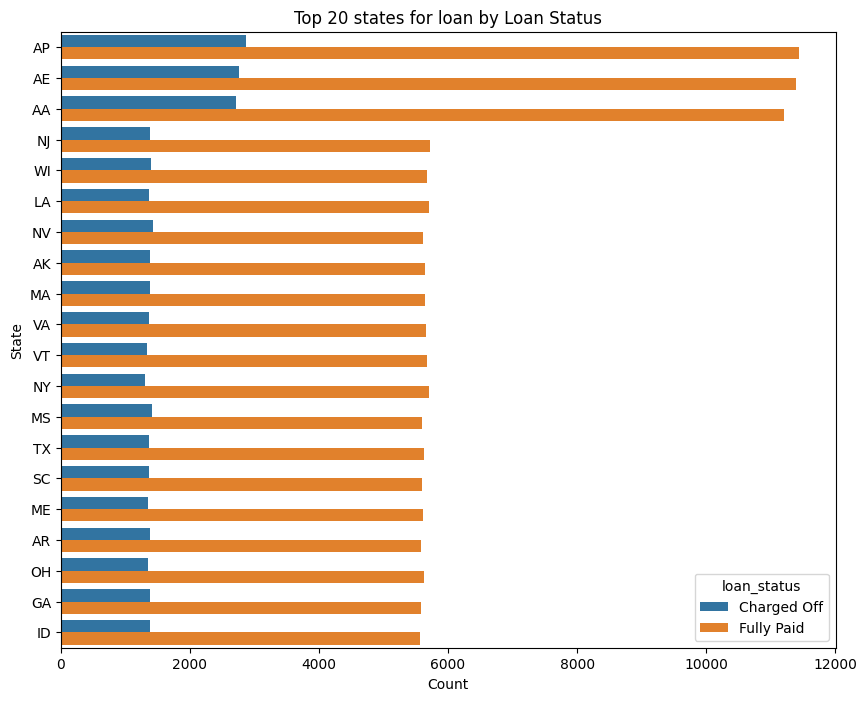

In [34]:
# Count the occurrences of each state
top_20_states = df['state'].value_counts().head(20)

# Create a horizontal countplot
plt.figure(figsize=(10, 8))
sns.countplot(y='state', data=df, hue='loan_status', order=top_20_states.index)
plt.title('Top 20 states for loan by Loan Status')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

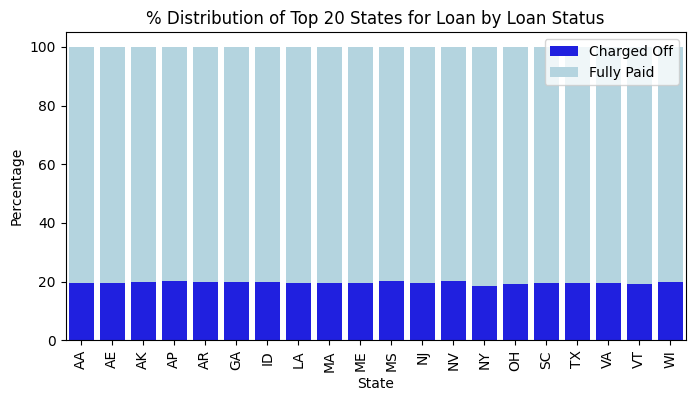

In [35]:
# Filter the data based on Top 20 States for loan
top_20_states = df['state'].value_counts().head(20).index
filtered_df = df[df['state'].isin(top_20_states)]

# Calculate percentage of loan status within each state
lc_state = filtered_df.groupby(['state', 'loan_status']).size().unstack()
lc_state = lc_state.div(lc_state.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(8, 4))

# Plotting stacked bars
sns.barplot(x=lc_state.index, y=lc_state['Charged Off'], color='blue', label='Charged Off')
sns.barplot(x=lc_state.index, y=lc_state['Fully Paid'], bottom=lc_state['Charged Off'], color='lightblue', label='Fully Paid')

# Adding labels and title
plt.title('% Distribution of Top 20 States for Loan by Loan Status')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend()
plt.show()

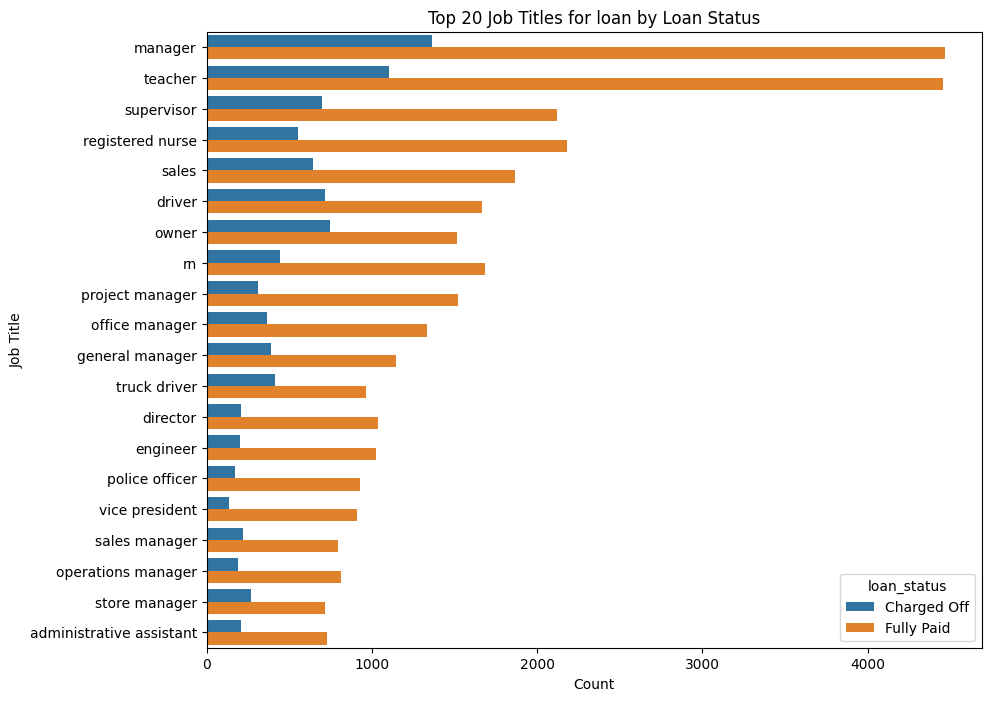

In [36]:
# Count the occurrences of each job title
top_20_emp_titles = df['emp_title'].value_counts().head(20)

# Create a horizontal countplot
plt.figure(figsize=(10, 8))
sns.countplot(y='emp_title', data=df, hue='loan_status', order=top_20_emp_titles.index)
plt.title('Top 20 Job Titles for loan by Loan Status')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

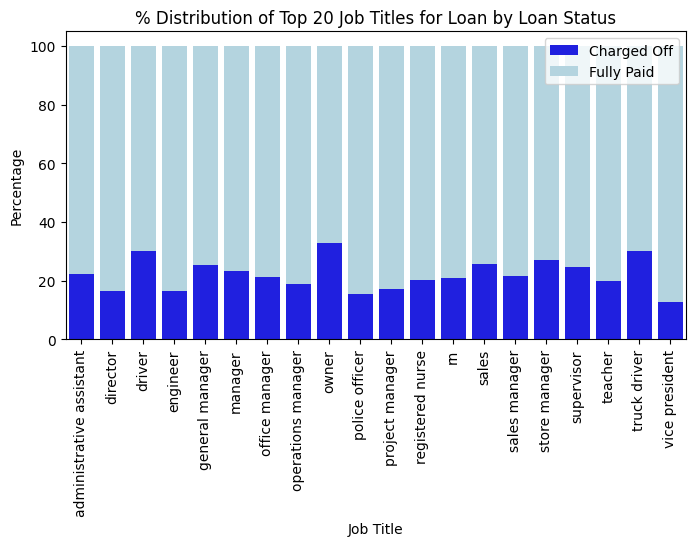

In [37]:
# Filter the data based on Top 20 Job Titles for loan
top_20_emp_titles = df['emp_title'].value_counts().head(20).index
filtered_df = df[df['emp_title'].isin(top_20_emp_titles)]

# Calculate percentage of loan status within each emp_title
lc_emp_title = filtered_df.groupby(['emp_title', 'loan_status']).size().unstack()
lc_emp_title = lc_emp_title.div(lc_emp_title.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(8, 4))

# Plotting stacked bars
sns.barplot(x=lc_emp_title.index,y=lc_emp_title['Charged Off'],color='blue',label='Charged Off')
sns.barplot(x=lc_emp_title.index,y=lc_emp_title['Fully Paid'],bottom=lc_emp_title['Charged Off'],
            color='lightblue',label='Fully Paid')

# Adding labels and title
plt.title('% Distribution of Top 20 Job Titles for Loan by Loan Status')
plt.xlabel('Job Title')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Insights:**

*  The % of defaulters is much higher for longer (60-month) term.
*  Direct pay application type has higher default rate compared to individual/joint.
*  Grade/sub-grade has the maximum impact on loan_status with grade A1 having minimum and G5 having maximum defaulters.
*  Loan taken for the purpose of small business has the highest rate of default.
*  Loan taken by owners and drivers has the highest rate of default.
*  Zip codes such as 11650, 86630 and 93700 have 100% defaulters.
*  We can remove initial_list_status and state as they have no impact on loan_status.


**Impact of numerical features on loan status**

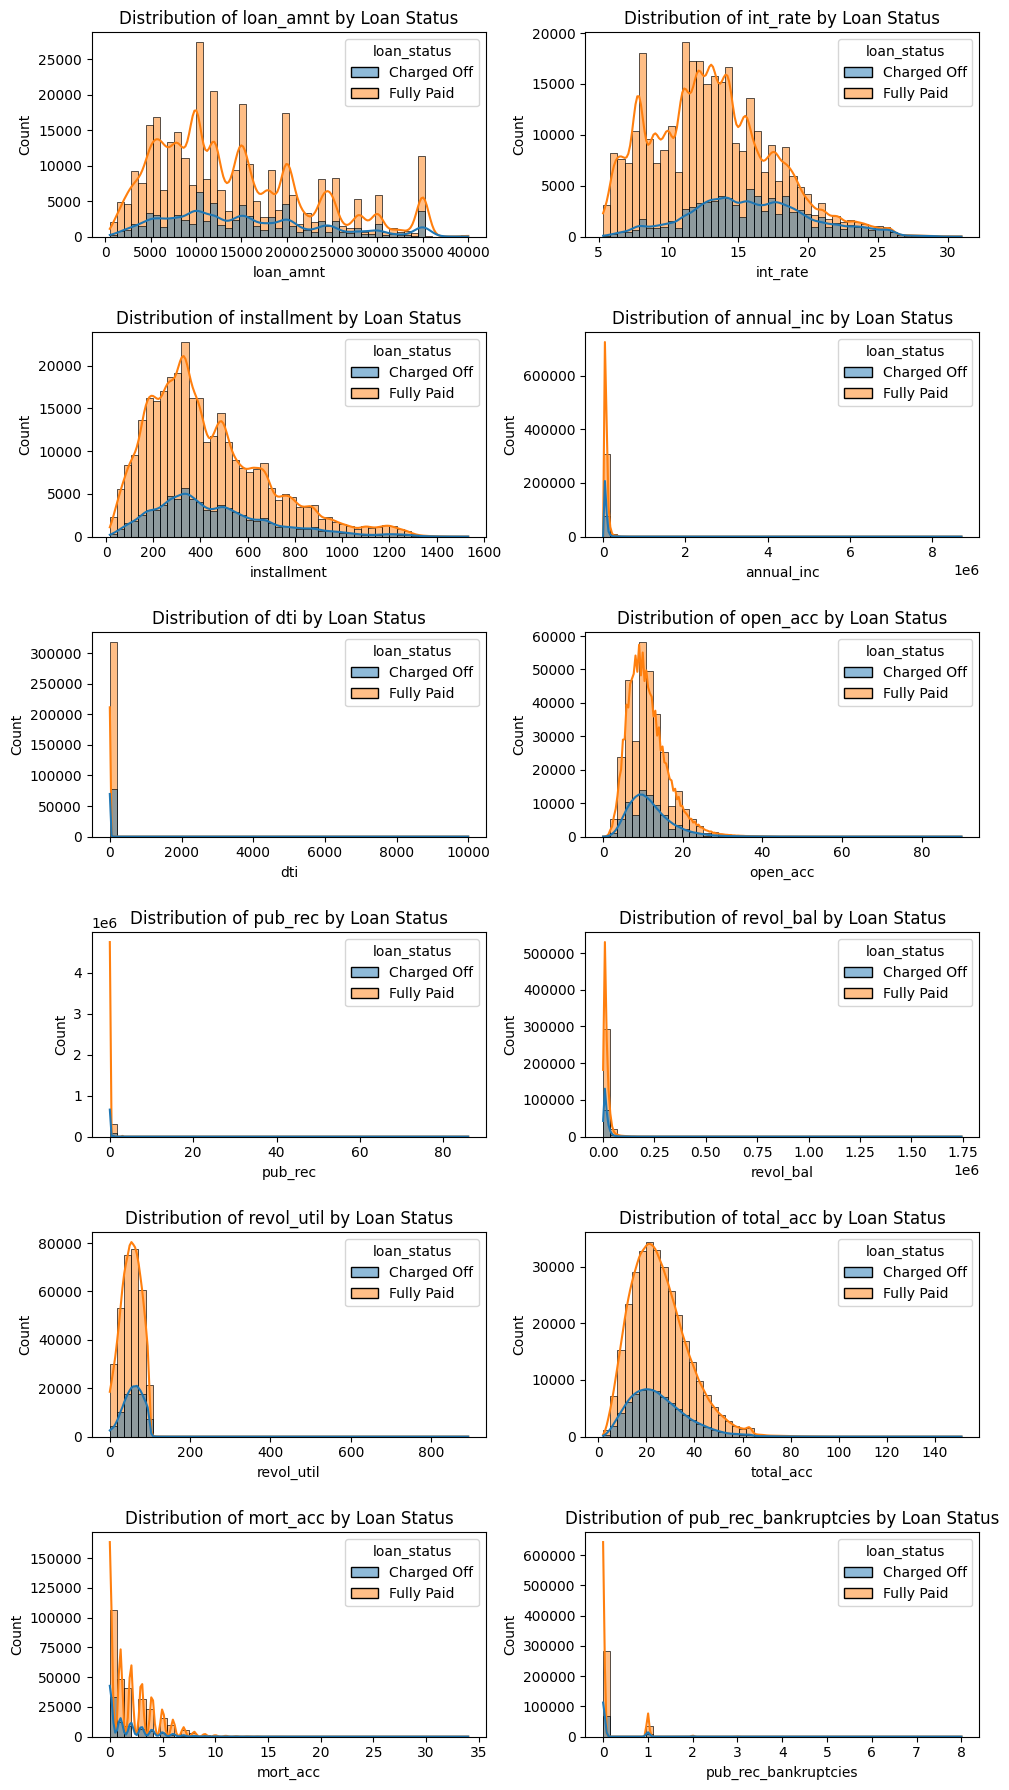

In [38]:
plt.subplots(6, 2, figsize=(10, 18))

for i, col in enumerate(num_cols):
  ax=plt.subplot(6,2,i+1)
  sns.histplot(data=df, x=col, hue='loan_status', kde=True, bins=50)
  plt.title(f'Distribution of {col} by Loan Status')

plt.tight_layout()
plt.show()

**Insights:**

*  It can be observed that the mean loan_amnt, int_rate, dti, open_acc and revol_util are higher for defaulters.

*  The mean annual income is lower for defaulters.

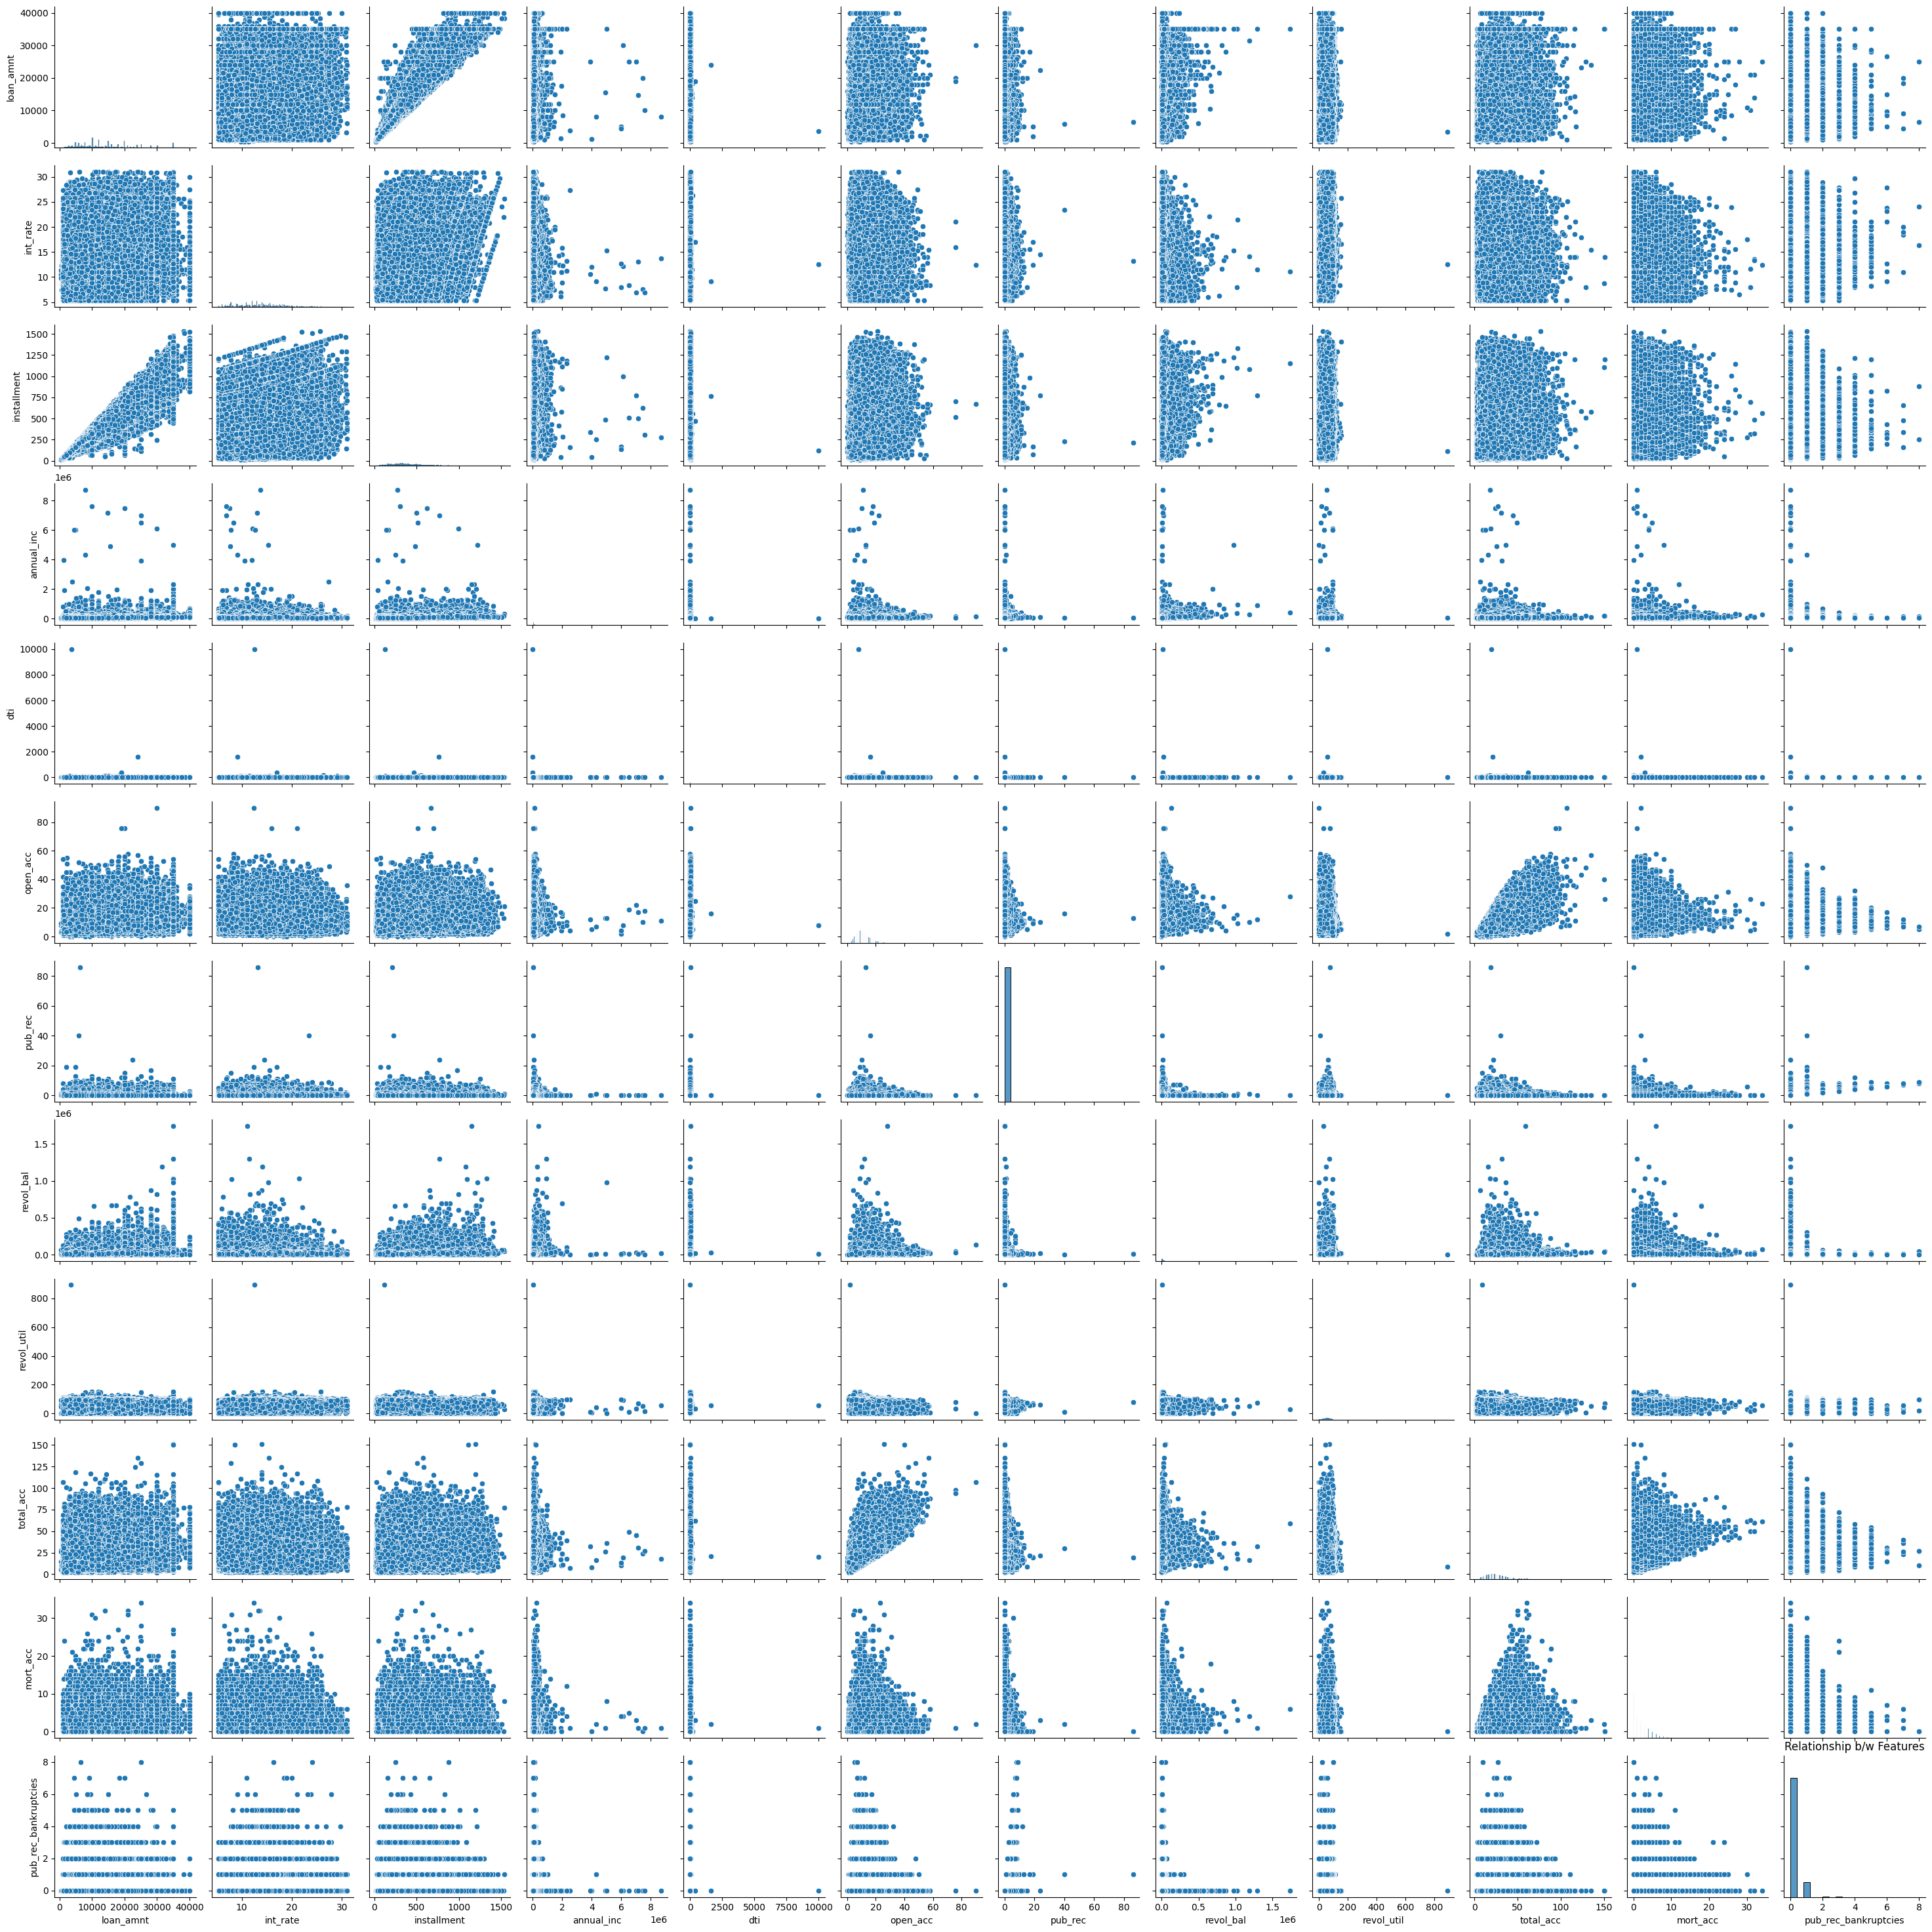

In [39]:
# Checking the overall linearity and correlation across all features using pairplot

sns.pairplot(df)
plt.title('Relationship b/w Features')
plt.show()

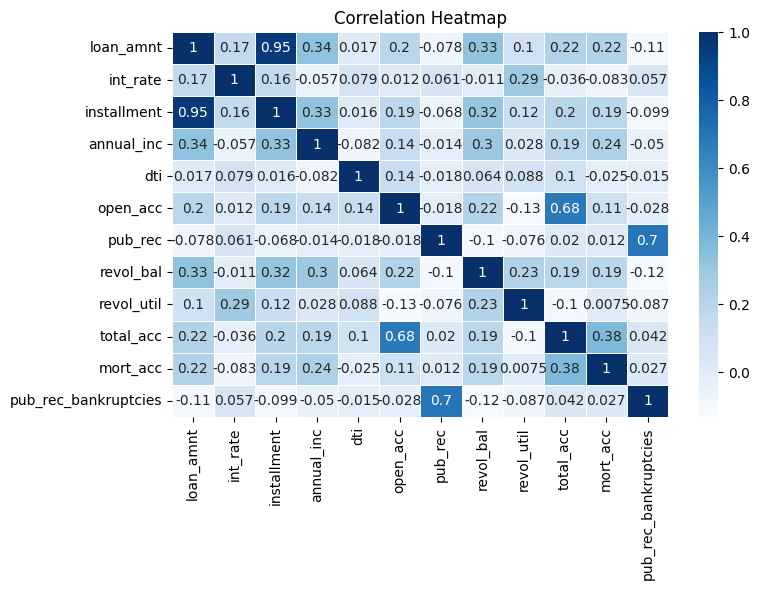

In [40]:
# Create a heatmap for the correlation matrix

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues',edgecolors='black',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Insights:**

*  loan_amnt vs. installment: Almost perfect correlation suggests higher loan amounts lead to higher monthly installments.

*  pub_rec_bankruptcies vs. pub_rec: Strong positive correlation shows a strong link between bankruptcies and public records.

*  open_acc vs. total_acc: Strong positive correlation shows borrowers with more open accounts typically have more total accounts.

*  mort_acc vs. total_acc: Moderate positive correlation suggests more mortgage accounts are associated with more total accounts.

*  loan_amnt vs. annual_inc: Moderate positive correlation indicates borrowers with higher incomes tend to borrow larger amounts.

*  installment vs. annual_inc: Moderate positive correlation indicates borrowers with higher incomes tend to have larger installments.

*  int_rate vs. revol_util: Moderate positive correlation shows higher interest rates are linked to higher credit utilization.

*  annual_inc vs. revol_bal: Moderate positive correlation suggests higher incomes are associated with higher revolving balances.

*  loan_amnt vs. revol_bal: Moderate positive correlation indicates larger loan amounts are linked to higher revolving balances.

*  dti vs. int_rate: Weak positive correlation suggests slightly higher debt-to-income ratios result in higher interest rates.


We can remove some of these correlated features to avoid multicolinearity.

## Data Preprocessing


In [41]:
# Check for Duplicate Values

df.duplicated().sum()

0

### Missing value treatment

In [42]:
# Check for Missing Values

df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
state                       0
zip_code                    0
dtype: int64

In [43]:
# Filling missing values with 'unknown' for object dtype

fill_values = {'title': 'unknown', 'emp_title': 'unknown'}
df.fillna(value=fill_values, inplace=True)

In [44]:
# Mean aggregation of mort_acc by total_acc to fill missing values

avg_mort = df.groupby('total_acc')['mort_acc'].mean()

def fill_mort(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return avg_mort[total_acc].round()
  else:
    return mort_acc

df['mort_acc'] = df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']), axis=1)

In [45]:
# Dataset is very large so we can drop the rows with null values for rest of the columns

df.dropna(inplace=True)

In [46]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
state                   0
zip_code                0
dtype: int64

In [47]:
df.shape

(376929, 29)

### Outlier treatment


In [48]:
num_cols = df.select_dtypes(include=['float64']).columns.tolist()
print(num_cols)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


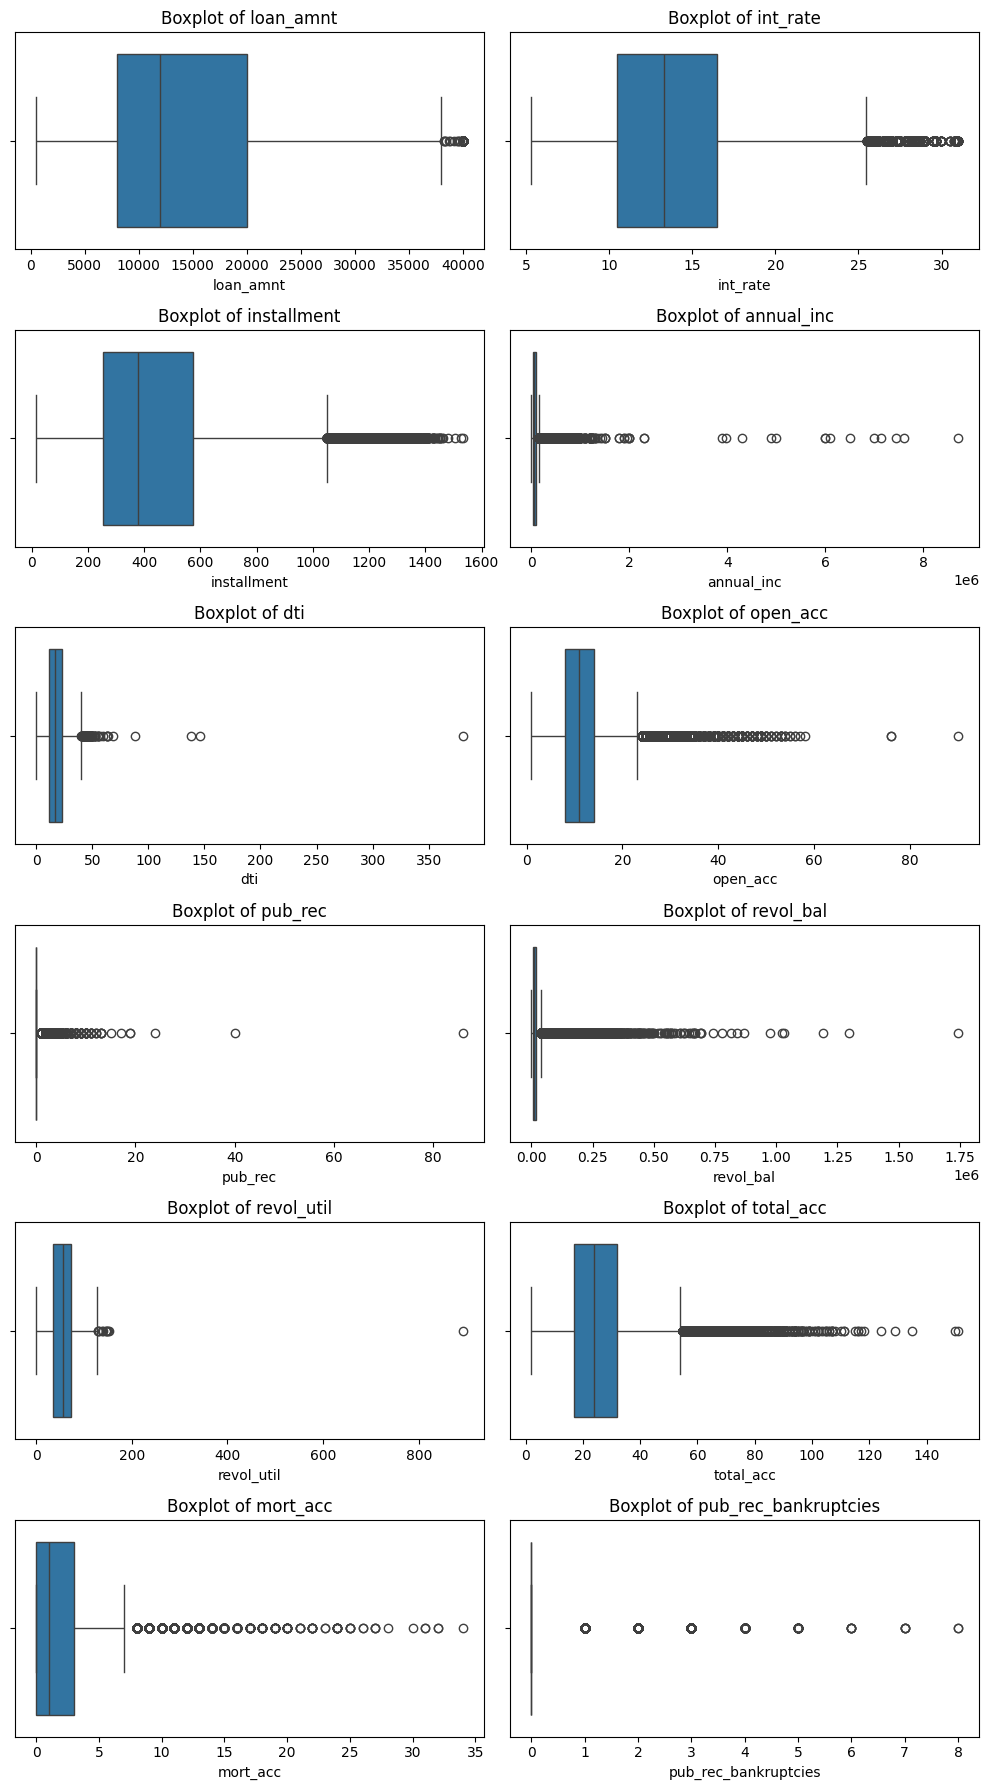

In [49]:
# Boxplot for Outliers check

plt.subplots(6, 2, figsize=(10, 18))

for i, col in enumerate(num_cols):
  ax=plt.subplot(6,2,i+1)
  sns.boxplot(data=df[col], orient='h')
  plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

**Insights:** Clearly, many columns have outliers.

Here extreme values might represent genuinely high or low financial statuses, capping is the most appropriate technique. This method balances between preserving the integrity of the data and mitigating the influence of extreme outliers.

In [50]:
def cap_outliers(df, col, lower_percentile=0.01, upper_percentile=0.99):
    lower_cap = df[col].quantile(lower_percentile)
    upper_cap = df[col].quantile(upper_percentile)
    df[col] = np.where(df[col] < lower_cap, lower_cap, df[col])
    df[col] = np.where(df[col] > upper_cap, upper_cap, df[col])
    return df

for col in ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
            'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc']:
    df = cap_outliers(df, col)

In [51]:
# Convert pub_rec, mort_acc and pub_rec_bankruptcies using 0 or 1 approach

df['pub_rec'] = np.where(df['pub_rec']>0,1,0)
df['mort_acc'] = np.where(df['mort_acc']>0,1,0)
df['pub_rec_bankruptcies'] = np.where(df['pub_rec_bankruptcies']>0,1,0)

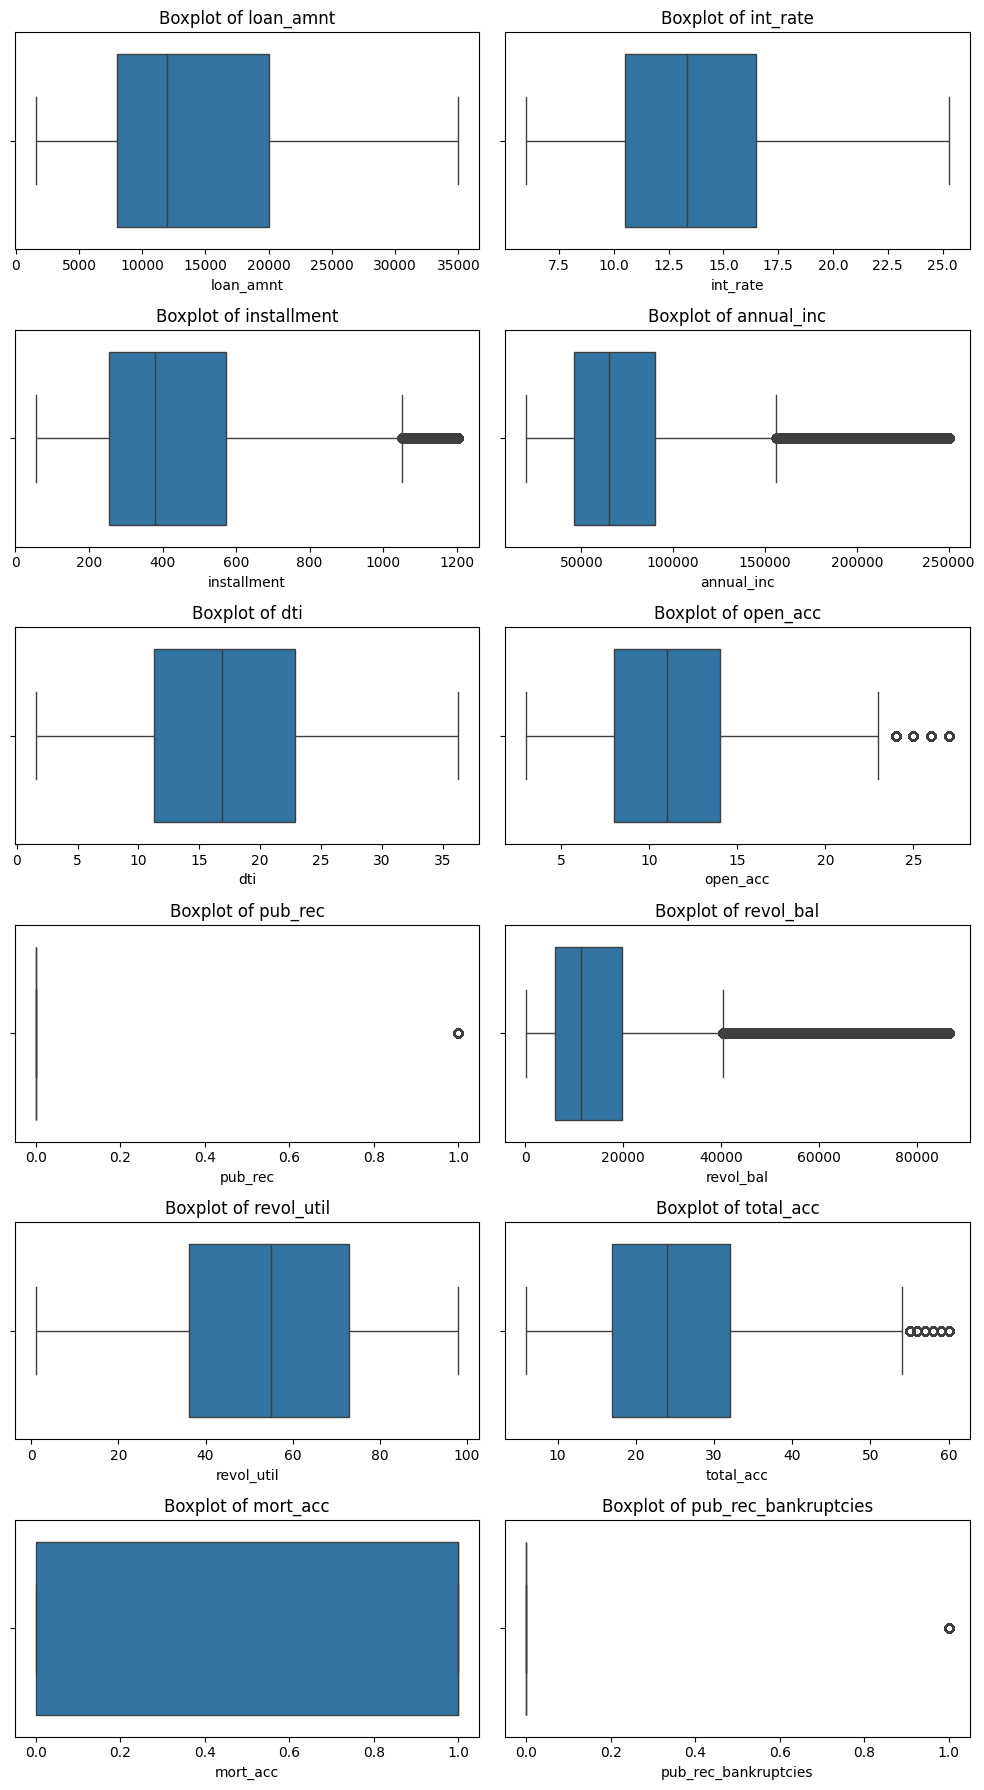

In [52]:
plt.subplots(6, 2, figsize=(10, 18))

for i, col in enumerate(num_cols):
  ax=plt.subplot(6,2,i+1)
  sns.boxplot(data=df[col], orient='h')
  plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

**Countplots for pub_rec, mort_acc and pub_rec_bankruptcies**

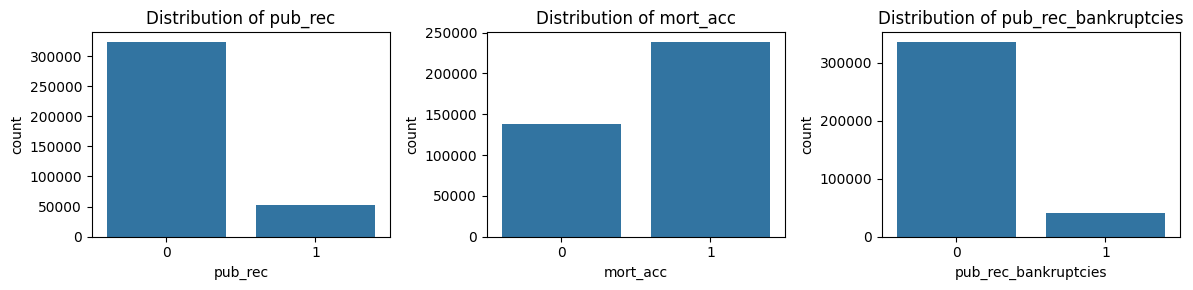

In [53]:
cols = ['pub_rec','mort_acc','pub_rec_bankruptcies']

plt.subplots(1, 3, figsize=(12, 3))

for i, col in enumerate(cols):
  ax = plt.subplot(1,3,i+1)
  sns.countplot(x=df[col])
  plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

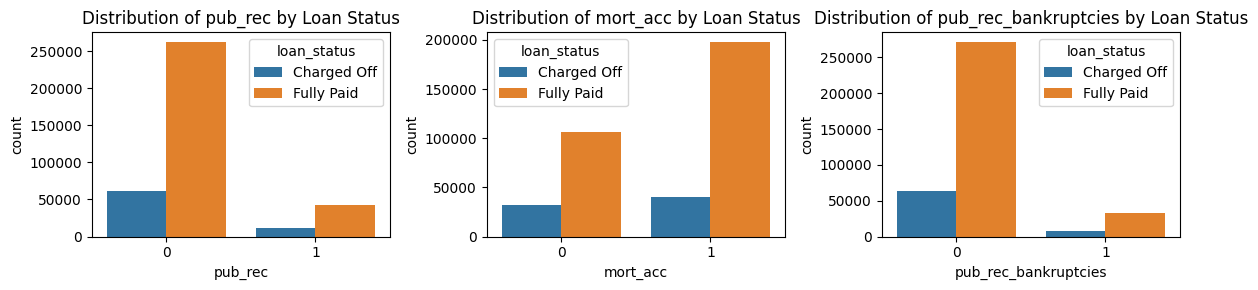

In [54]:
cols = ['pub_rec','mort_acc','pub_rec_bankruptcies']

plt.subplots(1, 3, figsize=(12, 3))

for i, col in enumerate(cols):
  ax = plt.subplot(1,3,i+1)
  sns.countplot(x=col, data=df, hue='loan_status')
  plt.title(f'Distribution of {col} by Loan Status')

plt.tight_layout()
plt.show()

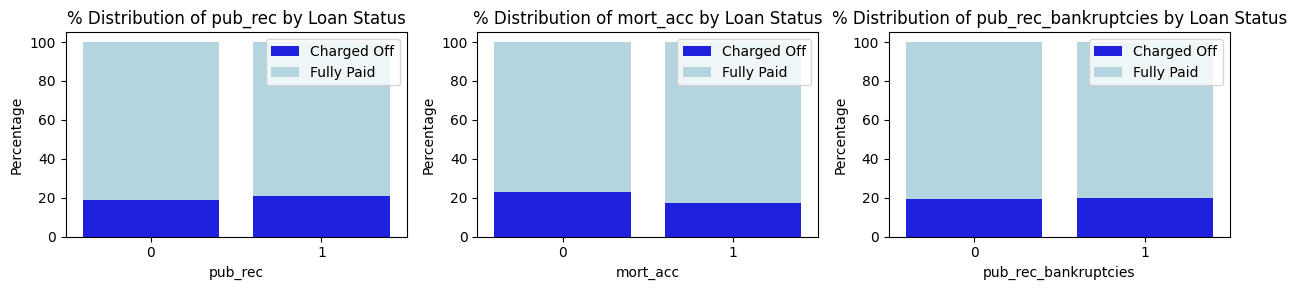

In [55]:
cols = ['pub_rec','mort_acc','pub_rec_bankruptcies']

plt.subplots(1, 3, figsize=(12.5, 3))

for i, col in enumerate(cols):
  # Calculate percentage of loan status within each column
  ls_col = df.groupby([col, 'loan_status']).size().unstack()
  ls_col = ls_col.div(ls_col.sum(axis=1), axis=0) * 100

  ax = plt.subplot(1,3,i+1)

  # Plotting stacked bars
  sns.barplot(x=ls_col.index, y=ls_col['Charged Off'], color='blue', label='Charged Off')
  sns.barplot(x=ls_col.index, y=ls_col['Fully Paid'], bottom=ls_col['Charged Off'], color='lightblue', label='Fully Paid')

  plt.title(f'% Distribution of {col} by Loan Status')
  plt.xlabel(f'{col}')
  plt.ylabel('Percentage')
  plt.legend()

plt.tight_layout()
plt.show()

**Insights:**

*  The majority of loans granted to individuals without a history of bankruptcy have been successfully repaid.

*  More loans are provided to the individuals having mortgage accounts.

*  pub_rec, mort_acc and pub_rec_bankruptcies don't seem to have any impact on loan_status surprisingly.


### Feature engineering

In [56]:
# Encoding Target Variable

df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off':1}).astype(int)

In [57]:
# Converting term values to numeric

df['term'] = df['term'].map({' 36 months': 36, ' 60 months':60}).astype(int)

In [58]:
# Convert employment length to numeric

d_values = {'10+ years':10, '4 years':4, '< 1 year':0, '6 years':6, '9 years':9, '2 years':2,
     '3 years':3, '8 years':8, '7 years':7, '5 years':5, '1 year':1}
df['emp_length'] = df['emp_length'].map(d_values).astype(int)

In [59]:
# Convert Initial List Status to numeric

df['initial_list_status'] = df['initial_list_status'].map({'w': 0, 'f': 1}).astype(int)

*  Drop installment as it was perfectly correlated with loan_amnt.
*  Remove sub_grade as it is similar to grade.
*  Remove address as it is no more required (state and zip code already extracted).
*  Remove initial_list_status and state as they have no impact on loan_status.
*  Remove issue_d as may not be relevant for determining loan eligibility or predicting loan status.
*  Remove emp_title as it is High cardinality categorical variable (many unique values), which will be difficult to handle and may not provide significant predictive power.
*  Remove title as it is similar to purpose, providing redundant information.
*  Remove earliest_cr_line as it is date-based feature, which might not be directly useful for modeling without extensive preprocessing.

In [60]:
# Dropping some variables which we can let go for now

df.drop(columns=['installment', 'issue_d', 'emp_title', 'title', 'sub_grade', 'address',
                 'state', 'earliest_cr_line'], axis=1, inplace=True)

In [61]:
# Remaining Categorical Features

cat_cols = df.select_dtypes('category').columns
print(cat_cols)

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'application_type', 'zip_code'],
      dtype='object')


In [62]:
# Perform one-hot encoding

df=pd.get_dummies(df, columns=cat_cols, drop_first=True)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [63]:
# Identify boolean columns
boolean_cols = df.select_dtypes(include='bool').columns

# Convert boolean columns to numerical columns
df[boolean_cols] = df[boolean_cols].astype(int)

In [64]:
df.head()

loan_amnt  term  int_rate  emp_length  annual_inc  loan_status    dti  \
0    10000.0    36     11.44          10    117000.0            0  26.24   
1     8000.0    36     11.99           4     65000.0            0  22.05   
2    15600.0    36     10.49           0     43057.0            0  12.79   
3     7200.0    36      6.49           6     54000.0            0   2.60   
4    24375.0    60     17.27           9     55000.0            1  33.95   

   open_acc  pub_rec  revol_bal  revol_util  total_acc  initial_list_status  \
0      16.0        0    36369.0        41.8       25.0                    0   
1      17.0        0    20131.0        53.3       27.0                    1   
2      13.0        0    11987.0        92.2       26.0                    1   
3       6.0        0     5472.0        21.5       13.0                    1   
4      13.0        0    24584.0        69.8       43.0                    1   

   mort_acc  pub_rec_bankruptcies  grade_B  grade_C  grade_D  grade_E  \
0         0                     0        1        0        0        0   
1         1                     0        1        0        0        0   
2         0                     0        1        0        0        0   
3         0                     0        0        0        0        0   
4         1                     0        0        1        0        0   

   grade_F  grade_G  home_ownership_MORTGAGE  home_ownership_NONE  \
0        0        0                        0                    0   
1        0        0                        1                    0   
2        0        0                        0                    0   
3        0        0                        0                    0   
4        0        0                        1                    0   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0                     0                   0                    1   
1                     0                   0                    0   
2                     0                   0                    1   
3                     0                   0                    1   
4                     0                   0                    0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             0   
1                                    0                             0   
2                                    1                             0   
3                                    0                             0   
4                                    0                             1   

   purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                    0                           0                    0   
1                    0                           1                    0   
2                    1                           0                    0   
3                    1                           0                    0   
4                    1                           0                    0   

   purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                         0              0                       0   
1                         0              0                       0   
2                         0              0                       0   
3                         0              0                       0   
4                         0              0                       0   

   purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  \
0                0               0              0                         0   
1                0               0              0                         0   
2                0               0              0                         0   
3                0               0              0                         0   
4                0               0              0                         0   

   purpose_small_business  p

## Data processing for modelling

In [65]:
df_copy = df.copy()

### Model 1

**Train-test split**

In [66]:
# Define the feature set and the target variable

X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [67]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'zip_code_05113', 'zip_code_11650',
       'zip_code_22690', 'zip_code_29597', 'zip_code_30723', 'zip_code_48052

In [68]:
# Let's split the data into training, validation and testing

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=42)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_val: {X_val.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_val: {y_val.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (226157, 51)
Shape of X_val: (75386, 51)
Shape of X_test: (75386, 51)
Shape of y_train: (226157,)
Shape of y_val: (75386,)
Shape of y_test: (75386,)


**Scaling Numeric Features**

In [69]:
# Scaling Numeric Features using MinMaxScaler

scaler = MinMaxScaler()

# Fit and transform the training data, then transform the test data
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

**Logistic Regression**

In [70]:
model = LogisticRegression()
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [71]:
model.coef_

array([[ 0.45115006,  0.45086439,  0.06203663, -0.08189352, -0.96362739,
         0.81220345,  0.63118932,  0.17926227, -0.39640497,  0.34433775,
        -0.44444202, -0.01326046, -0.10985184, -0.13930292,  0.52254168,
         0.96683813,  1.25250015,  1.49576335,  1.63304838,  1.69063936,
        -1.07426589, -0.9086115 , -1.75212653, -0.98772524, -0.82219586,
         0.17929024,  0.04888312,  0.39039469,  0.48229749,  0.69900122,
         0.51637787,  0.48707097,  0.53024571,  0.67744395,  0.49034776,
         0.5334193 ,  0.35401661,  0.9481074 ,  0.52450374,  0.27753532,
         0.2213234 , -0.6764741 , -5.76491072, 12.29610153,  4.66803178,
        -5.78231911,  4.67648689,  4.6847387 ,  4.66427513, 12.39828896,
        12.26963054]])

In [72]:
model.intercept_

array([-7.40120917])

In [73]:
# Model Evaluation

print('Train Accuracy :', model.score(X_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,train_preds).round(2))

print('\nTest Accuracy :',model.score(X_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,test_preds).round(2))

Train Accuracy : 0.89
Train F1 Score: 0.62
Train Recall Score: 0.46
Train Precision Score: 0.95

Test Accuracy : 0.89
Test F1 Score: 0.62
Test Recall Score: 0.46
Test Precision Score: 0.94


**Insights:**

*  Consistency Across Sets: The model's metrics are consistent between training and test sets, indicating it generalizes well without overfitting.

*  High Precision: High precision scores (0.95 train, 0.94 test) suggest the model is good at correctly identifying positive cases.

*  Low Recall: Low recall scores (0.46 for both train and test) indicate the model misses a significant number of actual positive cases.

*  Balanced Accuracy and F1: Balanced accuracy (0.89) and F1 scores (0.62) show an overall solid performance, but improvement in recall is needed.

**Hyperparameter tuning**

Let's start doing hyper parameter tuning on parameter $C = \frac{1}{\lambda}$  to increase the performance of the model.

In [74]:
def accuracy(y_true, y_pred):
  return np.sum(y_true==y_pred)/y_true.shape[0]

In [75]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = MinMaxScaler()

for la in np.arange(0.01, 1000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = accuracy(y_train, scaled_lr.predict(X_train))
  val_score = accuracy(y_val, scaled_lr.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

Now, let's plot the graph and pick the Regularization Parameter $λ$ which gives the best validation score.

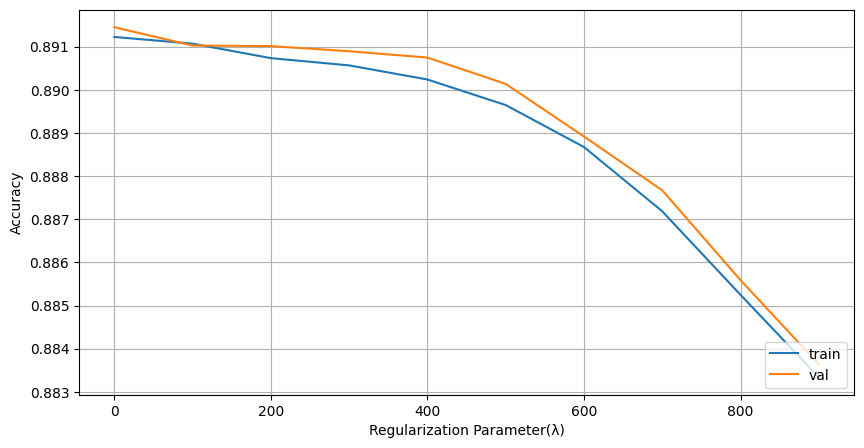

In [76]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 1000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 1000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

**Insights:** Note that Validation has a peak at 0 and then decreases.

Choosing $λ=0$ indicates that the best-performing logistic regression model does not require regularization. This suggests that the dataset does not exhibit overfitting, and the features are sufficient to model the target variable without penalization.

**Confusion Matrix**

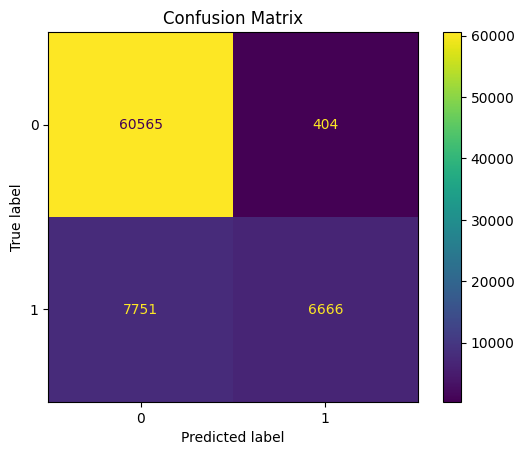

In [77]:
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

**Insights:** There is significant value for false negative and false positive, which will hamper our prediction due to type-1 or type-2 error.

**Classification Report**

In [78]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     60969
           1       0.94      0.46      0.62     14417

    accuracy                           0.89     75386
   macro avg       0.91      0.73      0.78     75386
weighted avg       0.90      0.89      0.88     75386



**Insights:**

*  Class Imbalance Impact: High precision for class 0 (89%) due to its dominance.

*  Low Recall for Class 1: Class 1's low recall (46%) suggests difficulty identifying all positives.

*  Balanced F1 Score: Weighted F1 (0.88) balances precision and recall performance effectively.



**ROC Curve & AUC**

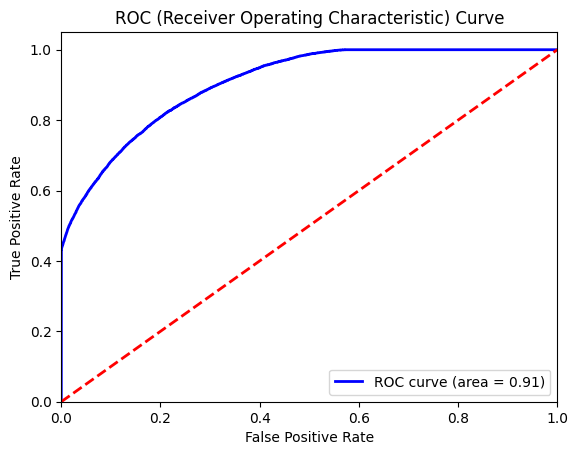

In [79]:
# Predict probabilities for the test set
probs = model.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.legend(loc="lower right")
plt.show()

**Insights:**

*  AUC of 0.91 signifies that the model is able to discriminate well between the positive and the negative class.
*  But it is not a good measure for an imbalanced target variable because it may be high even when the classifier has a poor score on the minority class.
*  This can happen when the classifier performs well on the majority class instances, which dominate the dataset. As a result, the AUC may appear high, but the model may not effectively identify the minority class instances.

**Precision Recall Curve**

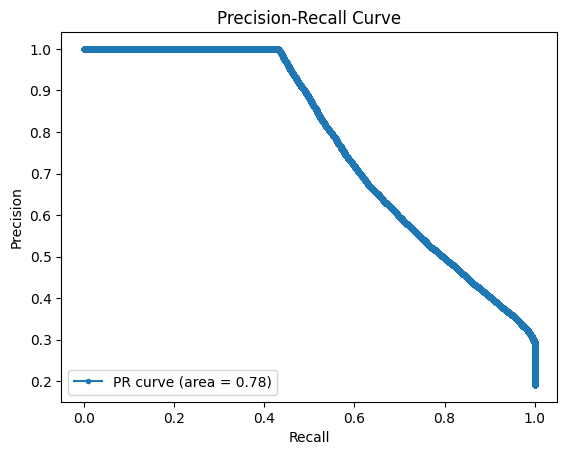

In [80]:
# Compute the false precision and recall at all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
auprc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

**Insights:** As expected, the area under precision recall curve is not as high. It is a decent model as the area is more than 0.5 (random model benchmark) but there is still scope for improvement.

### Assumption of Logistic Regression (Multicollinearity Check)

In [81]:
def calc_vif(X):
  vif = pd.DataFrame()

  vif['Feature'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  vif['VIF'] = round(vif['VIF'],2)
  vif=vif.sort_values(by='VIF',ascending=False)
  return vif

calc_vif(X)[:5]

Feature      VIF
40  application_type_INDIVIDUAL  1434.90
20      home_ownership_MORTGAGE   806.13
24          home_ownership_RENT   648.01
23           home_ownership_OWN   145.97
2                      int_rate   126.11

Now, we will drop the columns with high VIF's.

In [82]:
X.drop(columns=['application_type_INDIVIDUAL'],axis=1,inplace=True)
calc_vif(X)[:5]

Feature     VIF
2                     int_rate  126.09
20     home_ownership_MORTGAGE   83.42
24         home_ownership_RENT   64.09
28  purpose_debt_consolidation   52.18
1                         term   27.19

In [83]:
X.drop(columns=['int_rate'],axis=1,inplace=True)
calc_vif(X)[:5]

Feature    VIF
19     home_ownership_MORTGAGE  69.46
23         home_ownership_RENT  53.06
27  purpose_debt_consolidation  52.18
1                         term  27.15
26         purpose_credit_card  19.02

In [84]:
X.drop(columns=['home_ownership_MORTGAGE'],axis=1,inplace=True)
calc_vif(X)[:5]

Feature    VIF
1                         term  23.40
26  purpose_debt_consolidation  22.59
5                     open_acc  13.36
9                    total_acc  12.54
25         purpose_credit_card   8.55

In [85]:
X.drop(columns=['term'],axis=1,inplace=True)
calc_vif(X)[:5]

Feature    VIF
25  purpose_debt_consolidation  18.80
4                     open_acc  13.36
8                    total_acc  12.52
7                   revol_util   8.52
3                          dti   8.06

In [86]:
X.drop(columns=['purpose_debt_consolidation'],axis=1,inplace=True)
calc_vif(X)[:5]

Feature    VIF
4    open_acc  12.89
8   total_acc  12.52
7  revol_util   7.90
3         dti   7.67
2  annual_inc   7.30

In [87]:
X.drop(columns=['open_acc'],axis=1,inplace=True)
calc_vif(X)[:5]

Feature   VIF
6  revol_util  7.66
7   total_acc  7.63
2  annual_inc  7.23
3         dti  7.12
0   loan_amnt  6.57

### Model 2

In [88]:
X.columns

Index(['loan_amnt', 'emp_length', 'annual_inc', 'dti', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'mort_acc',
       'pub_rec_bankruptcies', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'home_ownership_NONE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'application_type_JOINT',
       'zip_code_05113', 'zip_code_11650', 'zip_code_22690', 'zip_code_29597',
       'zip_code_30723', 'zip_code_48052', 'zip_code_70466', 'zip_code_86630',
       'zip_code_93700'],
      dtype='object')

In [89]:
# Let's split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (301543, 45)
Shape of X_test: (75386, 45)
Shape of y_train: (301543,)
Shape of y_test: (75386,)


**Scaling Numeric Features**

In [90]:
# Scaling Numeric Features using MinMaxScaler

scaler = MinMaxScaler()

# Fit and transform the training data, then transform the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Oversampling with SMOTE**

In [91]:
# Oversampling to balance the target variable

sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")

Before OverSampling, count of label 1: 58072
Before OverSampling, count of label 0: 243471
After OverSampling, count of label 1: 243471
After OverSampling, count of label 0: 243471


**Logistic Regression**

In [92]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [93]:
model.coef_

array([[ 8.40694888e-01, -3.59107740e-02, -1.49839521e+00,
         9.38367270e-01, -7.07006868e-02, -4.66783751e-01,
         2.76057099e-01, -1.51173079e-01, -4.14807559e-02,
        -6.92479653e-02,  4.91912823e-02,  6.64774258e-01,
         1.18949508e+00,  1.54465502e+00,  1.86156712e+00,
         2.06044246e+00,  2.20391871e+00,  9.77163087e-02,
        -3.89201881e-01,  3.02136238e-03,  1.77879286e-01,
         2.16893263e-01,  5.71604242e-02, -1.46882374e-01,
        -2.59819864e-01, -9.90965803e-02, -7.67140736e-01,
        -3.36869740e-01, -2.46443825e-01, -3.85735195e-01,
        -1.60710116e-01, -2.19751145e-01,  1.00584291e-01,
        -5.04953489e-01, -9.77929397e-01, -1.89016747e+00,
        -1.13915702e+01,  1.40235904e+01,  6.10849241e+00,
        -1.14191964e+01,  6.09715418e+00,  6.12226362e+00,
         6.09422263e+00,  1.39781813e+01,  1.40430086e+01]])

In [94]:
model.intercept_

array([-7.71059178])

In [95]:
# Model Evaluation

print('Train Accuracy :', model.score(X_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,train_preds).round(2))

print('\nTest Accuracy :',model.score(X_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,test_preds).round(2))

Train Accuracy : 0.8
Train F1 Score: 0.6
Train Recall Score: 0.81
Train Precision Score: 0.48

Test Accuracy : 0.79
Test F1 Score: 0.6
Test Recall Score: 0.81
Test Precision Score: 0.48


**Confusion Matrix**

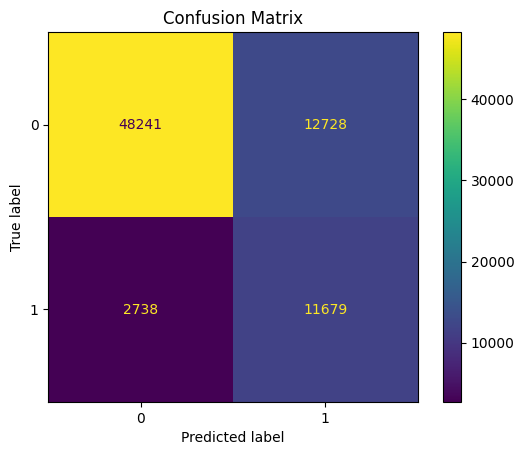

In [96]:
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

**Classification Report**

In [97]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     60969
           1       0.48      0.81      0.60     14417

    accuracy                           0.79     75386
   macro avg       0.71      0.80      0.73     75386
weighted avg       0.86      0.79      0.81     75386



**Insights:**

*  Improved Recall for Class 1: After SMOTE, recall for class 1 increased significantly from 0.46 to 0.81.

*  Decreased Precision for Class 1: Precision for class 1 dropped from 0.94 to 0.48, indicating more false positives.

*  Overall Accuracy Decline: Accuracy decreased from 0.89 to 0.79, showing trade-offs in handling class imbalance.

*  Balanced Recall Performance: Macro avg recall improved from 0.73 to 0.80, indicating better balance in identifying both classes.

**Feature Importance**

In [98]:
# Extract coefficients and create a DataFrame

coef_df = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'Coefficient': model.coef_[0]
})

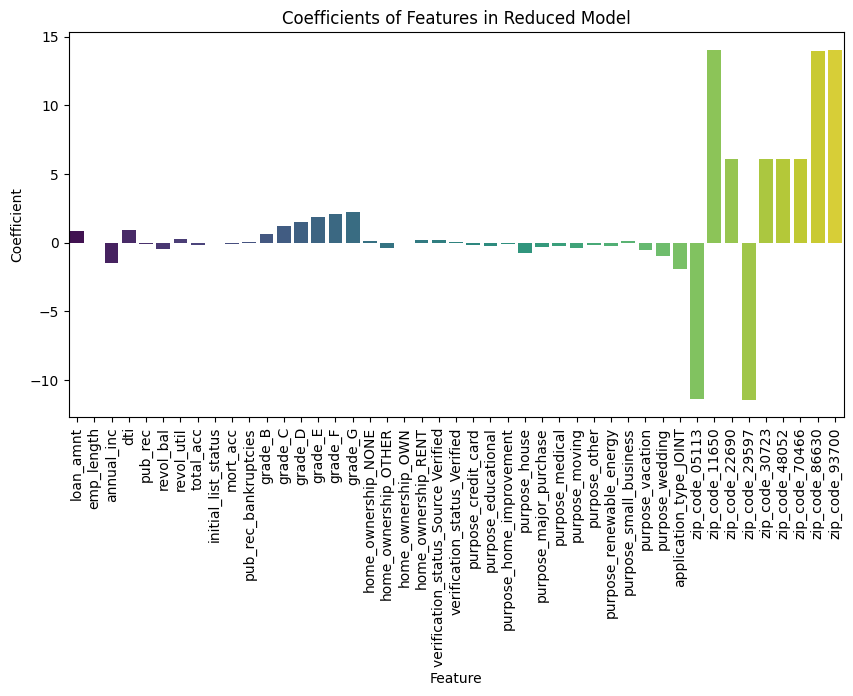

In [99]:
# Plot the coefficients

plt.figure(figsize=(10, 5))
sns.barplot(x='Feature', y='Coefficient', data=coef_df, palette='viridis')
plt.title('Coefficients of Features in Reduced Model')
plt.xticks(rotation=90)
plt.show()

**Insights:**

*  The model has assigned large weightage to zip_code features followed by grades, application_type, annual_inc, dti, loan_amnt, purpose, revol_bal, home_ownership and so on.

**ROC Curve & AUC**

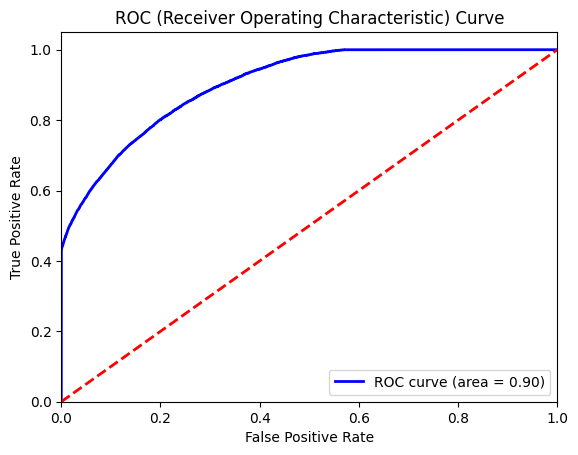

In [100]:
# Predict probabilities for the test set
probs = model.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.legend(loc="lower right")
plt.show()

**Insights:** Applying SMOTE and dropping high VIF columns slightly decreased AUROC from 0.91 to 0.90, indicating minimal impact on overall classification capability.

**Precision Recall Curve**

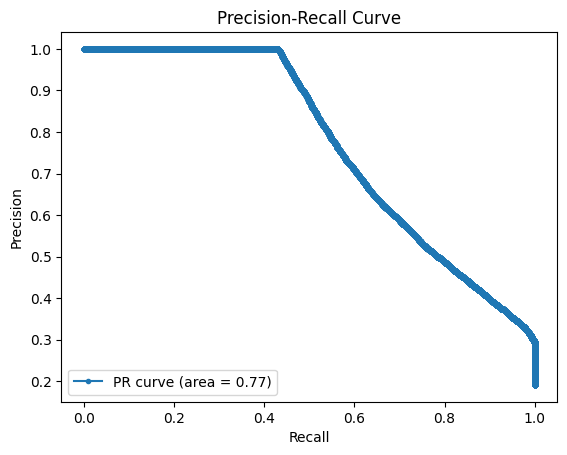

In [101]:
# Compute the false precision and recall at all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
auprc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

**Insights:** Applying SMOTE and dropping high VIF columns increased recall but decreased precision, resulting in a slight drop in PR curve area from 0.78 to 0.77.

**Note:**

*  Better Recall After SMOTE: Improved recall after SMOTE (0.46 to 0.81) means the model is better at identifying loan traps, reducing missed detections.

*  Trade-off in Precision: The drop in precision (0.94 to 0.48) indicates more false alarms, which could lead to unnecessary scrutiny of safe loans.

*  Overall Accuracy Drop: The overall drop in accuracy (0.89 to 0.79) suggests a trade-off in achieving a better balance between precision and recall.

*  Slight PR Curve Decrease: The minimal drop in PR curve area (0.78 to 0.77) indicates that the overall precision-recall balance is slightly affected but not drastically.

**Conclusion:**

For loan trap detection, the post-SMOTE model is better at catching potential traps due to higher recall, despite the trade-off in precision and accuracy. The improved recall makes it more suitable for identifying risky loans, though it may require handling more false positives.

## Tradeoff Questions



**How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.**

To ensure our model effectively detects real defaulters while minimizing false positives, we should prioritize techniques like SMOTE for balancing data, use algorithms like SVM and Random Forest optimized for high precision, and focus on evaluating with metrics such as F1-score to balance false positives and accurate defaulter detection.


**Since NPA (non-performing asset) is a real problem in this industry, it's important we play safe and shouldn't disburse loans to anyone.**

Given the concern around NPA in the lending industry, LoanTap must adopt cautious lending practices. Increasing recall minimizes false negatives, ensuring loans aren't disbursed to defaulters. Balancing precision and recall with an optimal threshold in logistic regression prevents excessive false positives without rejecting creditworthy applicants. This approach safeguards against both financial risks and missed opportunities.

## Questionnaire

1. **What percentage of customers have fully paid their Loan Amount?**

  80% of the customers have paid the loan fully while 20% are the defaulters.

2. **Comment about the correlation between Loan Amount and Installment features.**

  Almost perfect correlation (0.95) suggests higher loan amounts lead to higher monthly installments.

3. **The majority of people have home ownership as _______.**

  Around 50% people have home ownership as mortgages.

4. **People with grades A are more likely to fully pay their loan. (T/F)**

  Grade/sub-grade has the maximum impact on loan_status with grade A1 having minimum and G5 having maximum defaulters.
  Out of all people with grade 'A', 93% got their loan approved.

5. **Name the top 2 afforded job titles.**

  Manager and Teacher are the most afforded job titles for loan.

6. **Thinking from a bank's perspective, which metric should our primary focus be on?**

  While ROC AUC, Recall and F1 Score are also important metrics in evaluating model performance, Precision is particularly crucial for banks as it directly impacts their financial risk and profitability by reducing the number of erroneous loan approvals that could lead to defaults.


7. **How does the gap in precision and recall affect the bank?**

  The gap between precision and recall impacts the bank's risk and profitability. A higher precision reduces financial losses by minimizing false positives (default predictions on good borrowers), while a higher recall captures more good borrowers but increases the risk of false positives, affecting profitability and operational efficiency in loan approvals.

8. **Which were the features that heavily affected the outcome?**
  
  The following factors are heavily influencing the outcome in the specified order:
  zip code, grade/sub_grade, application_type, annual_inc, dti, loan_amnt, purpose, revol_bal and home_ownership.

9. **Will the results be affected by geographical location? (Yes/No)**

  Yes, zipcode (derived from address) has significant impact on the outcome.

## Insights

*  **Loan Duration Impact:** Longer terms (60 months) show higher default rates, affecting loan profitability.

*  **Job Title Influence:** Managers and teachers secure loans more easily, reflecting stable incomes.

*  **Grade and Payment Reliability:** Grade A borrowers exhibit high loan repayment rates compared to lower grades.

*  **Home Ownership:** Mortgages dominate, suggesting financial stability among borrowers.

*  **Loan Purpose Analysis:** Debt consolidation and credit card loans dominate, affecting default probability based on spending habits.

*  **High Default Zones:** Zip codes such as 11650, 86630 and 93700 have 100% default rates, indicating regional financial risk disparities.

*  **Income and Loan Size:** Higher incomes often correlate with larger loan amounts, affecting debt-to-income ratios and repayment capacity.

*  **Employment Stability:** Majority have over 10 years of employment, affecting loan approval and repayment probabilities.

*  **Improved Recall:** Post-SMOTE, recall for defaulters increased significantly from 46% to 81%.

*  **Precision Trade-off:** Precision dropped from 94% to 48%, indicating more false positives.

*  **Overall Accuracy:** Decreased from 89% to 79%, balancing precision and recall trade-offs.

*  **F1 Score Balance:** Weighted F1 of 0.88 balances precision and recall effectively post-SMOTE.

*  **PR Curve Evaluation:** Area decreased slightly from 0.78 to 0.77, reflecting improved but nuanced performance.

## Recommendations

*  **Enhance Data Balance:** Use techniques like SMOTE to address class imbalance, ensuring the model learns equally from both defaulters and non-defaulters for better predictive accuracy.

*  **Optimize Feature Selection:** Focus on features like zip code, credit history, income stability, and loan purpose, which strongly correlate with default risk to improve model robustness.

*  **Utilize Advanced Models:** Employ ensemble methods such as Gradient Boosting or Neural Networks to capture complex relationships and improve predictive performance beyond traditional models.

*  **Dynamic Threshold Adjustment:** Implement adaptive thresholding based on business objectives to balance between approving loans (recall) and avoiding defaults (precision) effectively.

*  **Continuous Model Monitoring:** Establish a framework for ongoing model validation and monitoring to ensure its performance remains aligned with evolving business and economic conditions.